# FX Trader Agent + Env/trainer | WFS | RL --> MLP + PPO | MCP entegrated

<font color = 'red'>

# Content:

1. [Libraries](#1)
2. [Data Import & Walk Forward Split](#2)
3. [EDA Pipeline](#3)
4. [Environment](#4)
5. [Agent](#5)
6. [Training Module](#6)
7. [Main Drive](#7)




<a id = "1"></a></br>

# 1) Libraries

In [2]:
# Core scientific stack
!pip install -U numpy pandas scipy

# Technical analysis indicators
!pip install -U ta

# Yahoo Finance data downloader
!pip install -U yfinance

# Reinforcement Learning / Gym
!pip install -U gymnasium

# PyTorch
!pip install -U torch torchvision torchaudio

# Utilities
!pip install -U requests tqdm

# plotting / debug
!pip install -U matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 138.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 136.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 73.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=bd0bc5130a185b2331bb4992ca4259eae18edc2081121dadf0cdc5fdff4fcaa7
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 109.4 MB/s eta 0:00:00
  Attempting uninstall: curl_cffi
    Found existing installation: curl_cffi 0.14.0
    Uninstalling curl_cffi-0.14.0:
      Successfully uninstalled curl_cffi-0.14.0
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.66
    Uninstalling yfinance-0.2.66:
      Successfully uninstalled yfinance-0.2.66


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 150.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.4.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 87.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully

<a id = "2"></a></br>

# 2) Data Import & Walk Forward Split

In [3]:
#utils/data_WFS.py
import pandas as pd
import numpy as np
import ta
from typing import List, Optional, Dict, Callable, Any, Tuple


# ============================================================
# 1. Load OHLCV Data From CSV
# ============================================================

def load_ohlcv_csv(
    path: str,
    time_col: str = "time",
    tz: Optional[str] = None,
) -> pd.DataFrame:
    """
    Loads OHLCV data from CSV and converts it into time-series format.
    Expected columns (case-insensitive): time, open, high, low, close, volume

    Robust to:
      - MultiIndex-like (two-row) CSV headers (common from yfinance exports)
      - Stray header rows accidentally included as data (e.g., 'GC=F' in numeric columns)
    """
    def _normalize_cols(cols):
        return [str(c).lower().strip().replace(" ", "_") for c in cols]

    def _post_process(df: pd.DataFrame) -> pd.DataFrame:
        # Normalize columns
        df.columns = _normalize_cols(df.columns)

        # Rename time column if needed
        tc = time_col.lower().strip()
        if tc != "time" and tc in df.columns:
            df = df.rename(columns={tc: "time"})

        required = {"time", "open", "high", "low", "close", "volume"}
        if not required.issubset(df.columns):
            raise ValueError(f"CSV must contain columns: {required}, found: {set(df.columns)}")

        # Parse time robustly
        df["time"] = pd.to_datetime(df["time"], errors="coerce")

        # Coerce numeric columns (this will turn 'GC=F' etc into NaN)
        num_cols = ["open", "high", "low", "close", "volume"]
        for c in num_cols:
            df[c] = pd.to_numeric(df[c], errors="coerce")

        # Drop rows that are not valid candles (e.g., header rows, empty rows)
        df = df.dropna(subset=["time"] + num_cols).copy()

        # Timezone handling
        if tz is not None:
            if getattr(df["time"].dt, "tz", None) is None:
                df["time"] = df["time"].dt.tz_localize(tz)
            else:
                df["time"] = df["time"].dt.tz_convert(tz)

        df = df.sort_values("time").reset_index(drop=True)
        df = df.set_index("time")
        return df

    # ---- 1) First attempt: normal read
    df = pd.read_csv(path)
    try:
        return _post_process(df)
    except Exception as e1:
        # ---- 2) Second attempt: try MultiIndex header (two header rows)
        try:
            df2 = pd.read_csv(path, header=[0, 1])
            # If MultiIndex, collapse to first level (Open/High/Low/Close/Volume)
            if isinstance(df2.columns, pd.MultiIndex):
                # turn ('Open','GC=F') -> 'open', keep only level0 names
                df2.columns = [str(c[0]) for c in df2.columns]
            return _post_process(df2)
        except Exception as e2:
            raise ValueError(
                f"Failed to load OHLCV CSV robustly.\n"
                f"First error: {type(e1).__name__}: {e1}\n"
                f"Second error (multi-header attempt): {type(e2).__name__}: {e2}\n"
                f"Path: {path}"
            )



# ============================================================
# 2. Add Technical Indicators (Parametric)
# ============================================================

def add_indicators(
    df: pd.DataFrame,
    rsi_window: int = 14,
    macd_slow: int = 26,
    macd_fast: int = 12,
    macd_signal: int = 9,
    stoch_window: int = 14,
    stoch_smooth: int = 3,
    bb_window: int = 20,
    bb_dev: float = 2.0,
    ma_windows: Tuple[int, int, int] = (20, 50, 200),
) -> pd.DataFrame:

    """
    Adds RSI, MACD, Stochastic, Bollinger Bands, and moving averages.
    Removes rows containing NaN values caused by indicators.

    Parameters
    ----------
    df : pd.DataFrame
        OHLCV dataset (open, high, low, close, volume).
    rsi_window : int
        RSI window length.
    macd_slow, macd_fast, macd_signal : int
        MACD parameters.
    stoch_window, stoch_smooth : int
        Stochastic Oscillator parameters.
    bb_window : int
        Bollinger Bands window size.
    bb_dev : float
        Standard deviation multiplier for Bollinger Bands.
    ma_windows : Tuple[int, int, int]
        Moving average windows (e.g., (20, 50, 200)).

    Returns
    -------
    df : pd.DataFrame
        DataFrame with added indicators and cleaned NaNs.
    """

    close = df["close"]
    high = df["high"]
    low = df["low"]

    # RSI
    df["rsi_14"] = ta.momentum.RSIIndicator(close=close, window=rsi_window).rsi()

    # MACD
    macd_ind = ta.trend.MACD(
        close=close,
        window_slow=macd_slow,
        window_fast=macd_fast,
        window_sign=macd_signal,
    )
    df["macd"] = macd_ind.macd()
    df["macd_signal"] = macd_ind.macd_signal()
    df["macd_hist"] = macd_ind.macd_diff()

    # Stochastic Oscillator
    stoch = ta.momentum.StochasticOscillator(
        high=high,
        low=low,
        close=close,
        window=stoch_window,
        smooth_window=stoch_smooth,
    )
    df["stoch_k"] = stoch.stoch()
    df["stoch_d"] = stoch.stoch_signal()

    # Bollinger Bands
    bb = ta.volatility.BollingerBands(
        close=close,
        window=bb_window,
        window_dev=bb_dev,
    )
    df["bb_high"] = bb.bollinger_hband()
    df["bb_mid"] = bb.bollinger_mavg()
    df["bb_low"] = bb.bollinger_lband()
    df["bb_width"] = ((df["bb_high"] - df["bb_low"]) / df["bb_mid"].replace(0, np.nan)).replace([np.inf, -np.inf], np.nan)


    # Moving Averages
    ma_short, ma_mid, ma_long = ma_windows
    df["ma_short"] = close.rolling(ma_short).mean()
    df["ma_mid"] = close.rolling(ma_mid).mean()
    df["ma_long"] = close.rolling(ma_long).mean()

    # Remove NaN rows
    df = df.dropna().copy()
    return df


# ============================================================
# 3. Windowed Dataset (10-Candle Window + t+1 Target)
# ============================================================

def build_windowed_dataset(
    df: pd.DataFrame,
    window_size: int = 10,
    target_shift: int = 1,
    feature_cols: Optional[List[str]] = None,
    target_cols: Optional[List[str]] = None,
    include_indicator_targets: bool = True,
) -> Dict[str, Any]:
    """
    Summary of the function:

    Builds a sliding-window dataset. ***this is the heart of my theory***

    X: (n_samples, window_size, n_features)
    y: (n_samples, n_targets)

    - X: for each sample, takes the candles [t-window_size ... t-1]
    - y: the target columns of candle t+target_shift

    Notes
    -----
    - t: reference candle index
    - X[k] = df[t-window_size : t-1]
    - y[k] = df[t + target_shift]
    - t_idx[k] = t + target_shift (time index of target candle)
    - times[t_idx[k]] = timestamp of the k-th sample's target candle

    Parameters
    ----------
    df : pd.DataFrame
        OHLCV dataset with indicators (time-indexed).
    window_size : int
        Number of candles to look back.
    target_shift : int
        How many steps ahead the target candle is (typically 1).
    feature_cols : Optional[List[str]]
        Columns used for X. If None, default features are used.
    target_cols : Optional[List[str]]
        Columns used for y. If None, base+indicators are used.
    include_indicator_targets : bool
        If True, indicator values are included in the target y.

    Indicators are added to dataframe for especially future use.

    Returns
    -------
    dict :
        {
            "X": np.ndarray,
            "y": np.ndarray,
            "time_index": np.ndarray,
            "times": np.ndarray,
            "feature_cols": List[str],
            "target_cols": List[str],
        }
    """
    # 1) Feature columns
    if feature_cols is None:
        feature_cols = [
            "open", "high", "low", "close", "volume",
            "rsi_14",
            "macd", "macd_signal", "macd_hist",
            "stoch_k", "stoch_d",
            "bb_high", "bb_mid", "bb_low", "bb_width",
            "ma_short", "ma_mid", "ma_long",
        ]

    # 2) Target columns
    if target_cols is None:
        base_target = ["open", "high", "low", "close"]
        if include_indicator_targets:
            indicator_target = [
                "rsi_14",
                "macd", "macd_signal", "macd_hist",
                "stoch_k", "stoch_d",
                "bb_high", "bb_mid", "bb_low", "bb_width",
                "ma_short", "ma_mid", "ma_long",
            ]
            target_cols = base_target + indicator_target
        else:
            target_cols = base_target

    # Column existence check
    missing_features = set(feature_cols) - set(df.columns)
    if missing_features:
        raise ValueError(f"Missing feature columns: {missing_features}")

    missing_targets = set(target_cols) - set(df.columns)
    if missing_targets:
        raise ValueError(f"Missing target columns: {missing_targets}")

    df_reset = df.reset_index()
    times = df_reset["time"].values

    n = len(df_reset)
    n_feat = len(feature_cols)
    n_tgt = len(target_cols)

    max_i = n - target_shift
    start_i = window_size
    n_samples = max_i - start_i
    if n_samples <= 0:
        raise ValueError(
            f"Dataset too small for window_size({window_size}) + target_shift({target_shift}). Total rows: {n}"
        )

    X = np.zeros((n_samples, window_size, n_feat), dtype=np.float32)
    y = np.zeros((n_samples, n_tgt), dtype=np.float32)
    t_idx = np.zeros(n_samples, dtype=np.int64)

    for k in range(n_samples):
        i = start_i + k
        ws = i - window_size
        we = i

        # Input window: past candles
        window_df = df_reset.loc[ws:we - 1, feature_cols]
        X[k] = window_df.values

        # Target row: candle at t+shift
        target_i = i + target_shift
        target_row = df_reset.loc[target_i, target_cols]
        y[k] = target_row.values

        t_idx[k] = target_i

    return {
        "X": X,
        "y": y,
        "time_index": t_idx,
        "times": times,
        "feature_cols": feature_cols,
        "target_cols": target_cols,
    }


# ============================================================
# 4. Walk-Forward (Rolling / Expanding) Split Generator
# ============================================================

def generate_walk_forward_splits(
    n_samples: int,
    initial_train_size: int,
    step_size: int,
    test_size: int,
    rolling_train: bool = False,
    max_train_size: Optional[int] = None,
) -> List[Dict[str, int]]:
    """
    Generates walk-forward (rolling) splits.

    Default behavior for each step:
        train: [0, train_end)   (expanding window)
        test:  [train_end, train_end + test_size)

    Then shifts train_end += step_size.

    If rolling_train=True and max_train_size is specified:
        train_start = max(0, train_end - max_train_size)
        train: [train_start, train_end)

    Parameters
    ----------
    n_samples : int
        Total number of samples.
    initial_train_size : int
        Initial train size.
    step_size : int
        How much train_end advances at each step.
    test_size : int
        Number of samples in each test segment.
    rolling_train : bool
        Use rolling window with fixed max size if True.
    max_train_size : Optional[int]
        Max number of samples for rolling training.

    Returns
    -------
    splits : List[Dict[str, int]]
    """
    if initial_train_size <= 0:
        raise ValueError("initial_train_size must be > 0.")
    if test_size <= 0:
        raise ValueError("test_size must be > 0.")
    if step_size <= 0:
        raise ValueError("step_size must be > 0.")
    if initial_train_size + test_size > n_samples:
        raise ValueError(
            f"initial_train_size({initial_train_size}) + test_size({test_size}) "
            f"> n_samples({n_samples}). Reduce parameters."
        )

    splits: List[Dict[str, int]] = []
    train_end = initial_train_size

    while True:
        test_start = train_end
        test_end = train_end + test_size

        if test_end > n_samples:
            break

        if rolling_train and max_train_size is not None:
            train_start = max(0, train_end - max_train_size)
        else:
            train_start = 0  # expanding window

        splits.append({
            "train_start": train_start,
            "train_end": train_end,
            "test_start": test_start,
            "test_end": test_end,
        })

        train_end += step_size

    return splits


# ============================================================
# 5. Walk-Forward Training Loop (Logic: Model Weights Update)
# ============================================================

def walk_forward_train(
    X: np.ndarray,
    y: np.ndarray,
    splits: List[Dict[str, int]],
    train_step_fn: Callable[[np.ndarray, np.ndarray, int], Any],
    test_step_fn: Optional[Callable[[np.ndarray, np.ndarray, int], Any]] = None,
):
    """
    Walk-forward training loop.

    - train_step_fn: updates model weights at each step.
      signature: train_step_fn(X_train, y_train, step_idx) -> train_metrics

    - test_step_fn: optional test evaluation.
      signature: test_step_fn(X_test, y_test, step_idx) -> test_metrics

    Returns
    -------
    history : List[Dict[str, Any]]
        [
            {
                "step": int,
                "split": Dict[str, int],
                "train_metrics": Any,
                "test_metrics": Any,
            },
            ...
        ]
    """
    history: List[Dict[str, Any]] = []

    for step_idx, s in enumerate(splits):
        ts, te = s["train_start"], s["train_end"]
        vs, ve = s["test_start"], s["test_end"]

        X_train = X[ts:te]
        y_train = y[ts:te]

        X_test = X[vs:ve]
        y_test = y[vs:ve]

        # 🔥 MODEL WEIGHTS ARE UPDATED HERE
        train_metrics = train_step_fn(X_train, y_train, step_idx)

        test_metrics = None
        if test_step_fn is not None:
            test_metrics = test_step_fn(X_test, y_test, step_idx)

        history.append({
            "step": step_idx,
            "split": s,
            "train_metrics": train_metrics,
            "test_metrics": test_metrics,
        })

    return history


# ============================================================
# 6. End-to-End Example Pipeline (Optional)
# ============================================================

def build_full_walk_forward_pipeline(
    csv_path: str,
    window_size: int = 10,
    target_shift: int = 1,
    initial_train_ratio: float = 0.6,
    test_ratio_per_step: float = 0.1,
    step_ratio: float = 0.05,
    tz: Optional[str] = None,
    rolling_train: bool = False,
    max_train_size: Optional[int] = None,
) -> Dict[str, Any]:
    """
    One function that:
        - Loads CSV,
        - Adds indicators,
        - Builds sliding-window dataset,
        - Generates walk-forward splits.

    Parameters
    ----------
    csv_path : str
        Path of the OHLCV CSV.
    window_size : int
        Window size for inputs.
    target_shift : int
        Step distance of target candle.
    initial_train_ratio : float
        Ratio of samples used for first training segment.
    test_ratio_per_step : float
        Ratio of samples used for each test step.
    step_ratio : float
        Ratio of samples used to shift train_end each step.
    tz : Optional[str]
        Timezone (passed to load_ohlcv_csv).
    rolling_train : bool
        If True, uses a rolling window for training.
    max_train_size : Optional[int]
        Max train samples when rolling_train=True.

    Returns
    -------
    dict :
        {
            "X": np.ndarray,
            "y": np.ndarray,
            "splits": List[Dict[str, int]],
            "time_index": np.ndarray,
            "times": np.ndarray,
            "meta": {...}
        }
    """
    df = load_ohlcv_csv(csv_path, tz=tz)
    df = add_indicators(df)

    data = build_windowed_dataset(
        df,
        window_size=window_size,
        target_shift=target_shift,
        include_indicator_targets=True,
    )

    X = data["X"]
    y = data["y"]
    time_index = data["time_index"]
    times = data["times"]

    n_samples = X.shape[0]
    if n_samples <= 0:
        raise ValueError("No samples produced after indicator+window processing (n_samples=0).")

    initial_train_size = max(1, int(n_samples * initial_train_ratio))
    test_size = max(1, int(n_samples * test_ratio_per_step))
    step_size = max(1, int(n_samples * step_ratio))

    if initial_train_size >= n_samples:
        initial_train_size = n_samples - 1

    if initial_train_size + test_size > n_samples:
        test_size = max(1, n_samples - initial_train_size)

    splits = generate_walk_forward_splits(
        n_samples=n_samples,
        initial_train_size=initial_train_size,
        step_size=step_size,
        test_size=test_size,
        rolling_train=rolling_train,
        max_train_size=max_train_size,
    )

    return {
        "X": X,
        "y": y,
        "splits": splits,
        "time_index": time_index,
        "times": times,
        "meta": {
            "n_samples": n_samples,
            "window_size": window_size,
            "target_shift": target_shift,
            "initial_train_size": initial_train_size,
            "test_size": test_size,
            "step_size": step_size,
            "feature_cols": data["feature_cols"],
            "target_cols": data["target_cols"],
            "rolling_train": rolling_train,
            "max_train_size": max_train_size,
        },
    }


<a id = "3"></a></br>

# 3) EDA Pipeline

In [4]:
# utils/eda_pipeline.py
from __future__ import annotations

import numpy as np
import pandas as pd
from dataclasses import dataclass
from typing import Dict, Optional, Tuple, Literal, List, Any

EPS = 1e-12
OHLCV_COLS = ["open", "high", "low", "close", "volume"]
Mode = Literal["train", "eval", "live"]


# ============================================================
# Dataclasses
# ============================================================
@dataclass
class EDAReport:
    shape: Tuple[int, int]
    dtypes: Dict[str, str]
    nan_ratio: Dict[str, float]
    inf_counts: Dict[str, int]
    time_monotonic: bool
    time_duplicates: bool
    ohlc_violations: Dict[str, int]
    describe: Dict[str, Dict[str, float]]


@dataclass
class OutlierReport:
    n_rows: int
    n_outlier: int
    n_low_vol: int
    n_flagged: int
    outlier_ratio: float
    low_vol_ratio: float
    flagged_ratio: float


@dataclass
class Normalizer:
    feature_cols: List[str]
    mean: np.ndarray  # shape (n_features,)
    std: np.ndarray   # shape (n_features,)

    def apply(self, df: pd.DataFrame) -> pd.DataFrame:
        df2 = df.copy()
        X = df2[self.feature_cols].to_numpy(dtype=np.float32)
        Xn = (X - self.mean.reshape(1, -1)) / self.std.reshape(1, -1)
        df2.loc[:, self.feature_cols] = Xn
        return df2


# ============================================================
# 1) EDA CHECKS
# ============================================================
def run_eda_checks(df: pd.DataFrame) -> EDAReport:
    num = df.select_dtypes(include=[np.number])
    inf_counts = {c: int(np.isinf(num[c].to_numpy()).sum()) for c in num.columns}
    nan_ratio = (df.isna().mean()).to_dict()

    idx = df.index
    time_monotonic = bool(idx.is_monotonic_increasing)
    time_duplicates = bool(idx.has_duplicates)

    bad_high = int((df["high"] < df[["open", "close"]].max(axis=1)).sum()) if {"high","open","close"} <= set(df.columns) else 0
    bad_low  = int((df["low"]  > df[["open", "close"]].min(axis=1)).sum()) if {"low","open","close"} <= set(df.columns) else 0
    bad_hl   = int((df["high"] < df["low"]).sum()) if {"high","low"} <= set(df.columns) else 0

    # describe: restrict with percentile for prevent bigger json
    desc = df.describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).to_dict()

    return EDAReport(
        shape=tuple(df.shape),
        dtypes={c: str(t) for c, t in df.dtypes.items()},
        nan_ratio=nan_ratio,
        inf_counts=inf_counts,
        time_monotonic=time_monotonic,
        time_duplicates=time_duplicates,
        ohlc_violations={"bad_high": bad_high, "bad_low": bad_low, "bad_high_lt_low": bad_hl},
        describe=desc,
    )


def _print_eda_summary(eda: EDAReport, title: str = "EDA", top_k: int = 8) -> None:
    print(f"\n[{title}] shape={eda.shape} | time_monotonic={eda.time_monotonic} | time_duplicates={eda.time_duplicates}")
    if any(v > 0 for v in eda.inf_counts.values()):
        bad_inf = [(k, v) for k, v in eda.inf_counts.items() if v > 0]
        bad_inf.sort(key=lambda x: x[1], reverse=True)
        print(f"[{title}] INF counts (top): {bad_inf[:top_k]}")

    bad_nan = [(k, float(v)) for k, v in eda.nan_ratio.items() if float(v) > 0.0]
    if bad_nan:
        bad_nan.sort(key=lambda x: x[1], reverse=True)
        print(f"[{title}] NaN ratio (top): {[(k, round(v, 4)) for k, v in bad_nan[:top_k]]}")

    v = eda.ohlc_violations
    if any(int(x) > 0 for x in v.values()):
        print(f"[{title}] OHLC violations: {v}")
    else:
        print(f"[{title}] OHLC violations: OK")


# ============================================================
# 2) Rolling z-score helpers
# ============================================================
def _rolling_z(x: pd.Series, window: int, min_periods: Optional[int] = None) -> pd.Series:
    mp = min_periods if min_periods is not None else max(10, window // 5)
    mu = x.rolling(window=window, min_periods=mp).mean()
    sd = x.rolling(window=window, min_periods=mp).std(ddof=1)
    sd = sd.replace(0.0, np.nan)
    z = (x - mu) / sd
    return z.fillna(0.0)


def _compute_candle_metrics(df_ohlcv: pd.DataFrame) -> pd.DataFrame:
    o = df_ohlcv["open"].astype(float)
    h = df_ohlcv["high"].astype(float)
    l = df_ohlcv["low"].astype(float)
    c = df_ohlcv["close"].astype(float)
    v = df_ohlcv["volume"].astype(float).clip(lower=0.0)

    rng = (h - l).clip(lower=0.0)
    range_ratio = (rng / c.replace(0.0, np.nan).abs()).replace([np.inf, -np.inf], np.nan).fillna(0.0)

    body = (c - o).abs()
    body_ratio = (body / rng.replace(0.0, np.nan)).replace([np.inf, -np.inf], np.nan).fillna(0.0)

    vol_log = np.log1p(v)

    return pd.DataFrame({"range_ratio": range_ratio, "body_ratio": body_ratio, "vol_log": vol_log}, index=df_ohlcv.index)


# ============================================================
# 3) Outlier detection (candlestick-only)
# ============================================================
def detect_outliers(
    df_ohlcv: pd.DataFrame,
    window: int = 200,
    z_thr_range: float = 3.0,
    z_thr_body: float = 3.0,
    z_thr_vol: float = 3.0,
    score_k: int = 2,
) -> pd.Series:
    m = _compute_candle_metrics(df_ohlcv)
    z_range = _rolling_z(m["range_ratio"], window).abs()
    z_body  = _rolling_z(m["body_ratio"],  window).abs()
    z_vol   = _rolling_z(m["vol_log"],     window).abs()

    score = (z_range > z_thr_range).astype(int) + (z_body > z_thr_body).astype(int) + (z_vol > z_thr_vol).astype(int)
    return (score >= int(score_k))


# ============================================================
# 4) Low-volume mask
# ============================================================
def low_volume_mask(
    df_ohlcv: pd.DataFrame,
    method: str = "rolling_quantile",   # "rolling_quantile" or "absolute"
    window: int = 200,
    q: float = 0.20,
    absolute: Optional[float] = None,
) -> pd.Series:
    v = df_ohlcv["volume"].astype(float).clip(lower=0.0)
    if method == "absolute":
        thr = float(absolute) if absolute is not None else 0.0
        return v <= thr

    thr = v.rolling(window=window, min_periods=max(10, window // 5)).quantile(q)
    thr = thr.fillna(v.quantile(q))
    return v <= thr


# ============================================================
# 5) NORMALIZATION (TRAIN-FIT, then APPLY)
# ============================================================
def fit_normalizer(
    df: pd.DataFrame,
    feature_cols: List[str],
    robust_clip_z: Optional[float] = None,
) -> Normalizer:

    X = df[feature_cols].to_numpy(dtype=np.float32)

    if robust_clip_z is not None:
        mu = np.nanmean(X, axis=0, keepdims=True)
        sd = np.nanstd(X, axis=0, keepdims=True) + EPS
        Z = (X - mu) / sd
        Z = np.clip(Z, -float(robust_clip_z), float(robust_clip_z))
        X = Z * sd + mu

    mean = np.nanmean(X, axis=0)
    std = np.nanstd(X, axis=0)
    std[std == 0.0] = 1.0
    std = np.where(np.isfinite(std), std, 1.0).astype(np.float32)
    mean = np.where(np.isfinite(mean), mean, 0.0).astype(np.float32)

    return Normalizer(feature_cols=feature_cols, mean=mean, std=std)


# ============================================================
# 6A) TRAIN: FLAG-ONLY + INDICATORS + NORMALIZE (DEFAULT)
# ============================================================
def build_training_df_with_eda_flags_and_norm(
    df_ohlcv_or_feat: pd.DataFrame,
    feature_cols: List[str],
    rolling_window: int = 200,
    z_thr_range: float = 3.0,
    z_thr_body: float = 3.0,
    z_thr_vol: float = 3.0,
    score_k: int = 2,
    volume_filter_method: str = "rolling_quantile",
    volume_q: float = 0.20,
    volume_absolute: Optional[float] = None,
    normalize: bool = True,
    robust_clip_z: Optional[float] = None,
    verbose: bool = True,
) -> Dict[str, Any]:
    """
    TRAIN (DEFAULT): interpolate yok ✅
    - outlier + lowvol detect -> flag columns
    - add_indicators -> raw OHLCV üstünden
    - normalize(feature_cols) -> env artık normalize yapmaz
    - return: df_train_norm, normalizer, masks, reports
    """

    # 0) OHLCV check
    missing = [c for c in OHLCV_COLS if c not in df_ohlcv_or_feat.columns]
    if missing:
        raise ValueError(f"EDA pipeline expects OHLCV columns, missing: {missing}")

    df_ohlcv = df_ohlcv_or_feat[OHLCV_COLS].copy()

    # 1) EDA checks (raw input)
    eda_raw = run_eda_checks(df_ohlcv_or_feat)
    if verbose:
        _print_eda_summary(eda_raw, title="EDA-RAW")

    # 2) Outliers + Low volume
    outliers = detect_outliers(
        df_ohlcv,
        window=rolling_window,
        z_thr_range=z_thr_range,
        z_thr_body=z_thr_body,
        z_thr_vol=z_thr_vol,
        score_k=score_k,
    )

    lv = low_volume_mask(
        df_ohlcv,
        method=volume_filter_method,
        window=rolling_window,
        q=volume_q,
        absolute=volume_absolute,
    )

    flagged = (outliers & lv)

    rep = OutlierReport(
        n_rows=int(len(df_ohlcv)),
        n_outlier=int(outliers.sum()),
        n_low_vol=int(lv.sum()),
        n_flagged=int(flagged.sum()),
        outlier_ratio=float(outliers.mean()) if len(df_ohlcv) else 0.0,
        low_vol_ratio=float(lv.mean()) if len(df_ohlcv) else 0.0,
        flagged_ratio=float(flagged.mean()) if len(df_ohlcv) else 0.0,
    )
    if verbose:
        print(
            f"[EDA-FLAG] rows={rep.n_rows} "
            f"outlier={rep.n_outlier}({rep.outlier_ratio:.4f}) "
            f"low_vol={rep.n_low_vol}({rep.low_vol_ratio:.4f}) "
            f"flagged={rep.n_flagged}({rep.flagged_ratio:.4f})"
        )

    # 3) Add flag columns (no interpolate!)
    df_flagged = df_ohlcv.copy()
    df_flagged["is_outlier_candle"] = flagged.astype(int)
    df_flagged["is_low_volume"] = lv.astype(int)

    # 4) Indicators (recompute)
    df_feat = add_indicators(df_flagged)

    # 5) EDA checks after indicators
    eda_feat = run_eda_checks(df_feat)
    if verbose:
        _print_eda_summary(eda_feat, title="EDA-FEATURES")

    # 6) Normalization (train-fit)
    normalizer = None
    df_norm = df_feat

    # normalize only feature_cols; flag columns will not be normalized
    missing_feat = [c for c in feature_cols if c not in df_feat.columns]
    if missing_feat:
        raise ValueError(f"normalize/feature_cols missing in df_feat: {missing_feat}")

    if normalize:
        normalizer = fit_normalizer(df_feat, feature_cols=feature_cols, robust_clip_z=robust_clip_z)
        df_norm = normalizer.apply(df_feat)

        if verbose:
            print(f"[NORM] applied on {len(feature_cols)} features | robust_clip_z={robust_clip_z}")

    return {
        "df_raw": df_ohlcv,
        "eda_raw": eda_raw,
        "outlier_mask": outliers,
        "low_volume_mask": lv,
        "flagged_mask": flagged,
        "outlier_report": rep,
        "df_flagged_ohlcv": df_flagged,
        "df_feat": df_feat,
        "df_train": df_norm,
        "normalizer": normalizer,
    }


# ============================================================
# 6B) EVAL: no-look-ahead (train normalizer ile apply)
# ============================================================
def build_eval_step_dfs_no_lookahead(
    train_df_ohlcv_or_feat: pd.DataFrame,
    test_df_ohlcv_or_feat: pd.DataFrame,
    feature_cols: List[str],
    rolling_window: int = 200,
    z_thr_range: float = 3.0,
    z_thr_body: float = 3.0,
    z_thr_vol: float = 3.0,
    score_k: int = 2,
    volume_filter_method: str = "rolling_quantile",
    volume_q: float = 0.20,
    volume_absolute: Optional[float] = None,
    normalize: bool = True,
    robust_clip_z: Optional[float] = None,
    verbose: bool = False,
) -> Dict[str, Any]:
    """
    Walk-forward eval:
    - TRAIN: flag + indicators + fit normalizer (train only)
    - TEST:  flag only + indicators + APPLY train normalizer
    """

    train_pack = build_training_df_with_eda_flags_and_norm(
        train_df_ohlcv_or_feat,
        feature_cols=feature_cols,
        rolling_window=rolling_window,
        z_thr_range=z_thr_range,
        z_thr_body=z_thr_body,
        z_thr_vol=z_thr_vol,
        score_k=score_k,
        volume_filter_method=volume_filter_method,
        volume_q=volume_q,
        volume_absolute=volume_absolute,
        normalize=normalize,
        robust_clip_z=robust_clip_z,
        verbose=verbose,
    )
    train_df_train = train_pack["df_train"]
    normalizer: Optional[Normalizer] = train_pack["normalizer"]

    # --- TEST: flag only ---
    missing = [c for c in OHLCV_COLS if c not in test_df_ohlcv_or_feat.columns]
    if missing:
        raise ValueError(f"Eval step expects OHLCV columns in test df, missing: {missing}")

    test_ohlcv = test_df_ohlcv_or_feat[OHLCV_COLS].copy()

    test_outliers = detect_outliers(
        test_ohlcv,
        window=rolling_window,
        z_thr_range=z_thr_range,
        z_thr_body=z_thr_body,
        z_thr_vol=z_thr_vol,
        score_k=score_k,
    )
    test_lv = low_volume_mask(
        test_ohlcv,
        method=volume_filter_method,
        window=rolling_window,
        q=volume_q,
        absolute=volume_absolute,
    )
    test_flagged = (test_outliers & test_lv)

    test_flagged_df = test_ohlcv.copy()
    test_flagged_df["is_outlier_candle"] = test_flagged.astype(int)
    test_flagged_df["is_low_volume"] = test_lv.astype(int)

    test_feat = add_indicators(test_flagged_df)

    # Apply train normalizer (no-look-ahead)
    if normalize and normalizer is not None:
        test_eval = normalizer.apply(test_feat)
    else:
        test_eval = test_feat

    return {
        "train_df_train": train_df_train,
        "test_df_eval": test_eval,
        "normalizer": normalizer,
        "train_pack": train_pack,
        "test_outlier_mask": test_outliers,
        "test_low_volume_mask": test_lv,
        "test_flagged_mask": test_flagged,
    }


<a id = "4"></a></br>

# 4) Environment

In [5]:
# utils/environment.py
from __future__ import annotations

from dataclasses import dataclass
from typing import Any, Dict, List, Optional, Tuple, Sequence

import numpy as np
import pandas as pd


# ============================================================
# 0) Candle pattern helpers (same as yours)  ✅ (UNCHANGED)
# ============================================================
def candle_features(
    df: pd.DataFrame,
    o="open", h="high", l="low", c="close",
    eps: float = 1e-12
) -> pd.DataFrame:
    O = df[o].astype(float)
    H = df[h].astype(float)
    L = df[l].astype(float)
    C = df[c].astype(float)

    body = (C - O).abs()
    rng = (H - L).clip(lower=eps)
    upper = (H - np.maximum(O, C)).clip(lower=0.0)
    lower = (np.minimum(O, C) - L).clip(lower=0.0)

    direction = np.sign(C - O)  # +1, 0, -1

    out = pd.DataFrame({
        "O": O, "H": H, "L": L, "C": C,
        "body": body,
        "range": rng,
        "upper": upper,
        "lower": lower,
        "dir": direction
    }, index=df.index)
    return out


def is_doji(f: pd.DataFrame, body_to_range_max: float = 0.1) -> pd.Series:
    return (f["body"] / f["range"]) <= body_to_range_max


def is_long_legged_doji(
    f: pd.DataFrame,
    body_to_range_max: float = 0.1,
    shadow_to_range_min: float = 0.3
) -> pd.Series:
    doji = is_doji(f, body_to_range_max)
    return doji & (f["upper"] / f["range"] >= shadow_to_range_min) & (f["lower"] / f["range"] >= shadow_to_range_min)


def is_dragonfly_doji(
    f: pd.DataFrame,
    body_to_range_max: float = 0.1,
    upper_to_range_max: float = 0.05,
    lower_to_range_min: float = 0.6
) -> pd.Series:
    doji = is_doji(f, body_to_range_max)
    return doji & (f["upper"] / f["range"] <= upper_to_range_max) & (f["lower"] / f["range"] >= lower_to_range_min)


def is_gravestone_doji(
    f: pd.DataFrame,
    body_to_range_max: float = 0.1,
    lower_to_range_max: float = 0.05,
    upper_to_range_min: float = 0.6
) -> pd.Series:
    doji = is_doji(f, body_to_range_max)
    return doji & (f["lower"] / f["range"] <= lower_to_range_max) & (f["upper"] / f["range"] >= upper_to_range_min)


def is_marubozu(
    f: pd.DataFrame,
    shadow_to_range_max: float = 0.05,
    body_to_range_min: float = 0.9
) -> pd.Series:
    return (f["upper"] / f["range"] <= shadow_to_range_max) & \
           (f["lower"] / f["range"] <= shadow_to_range_max) & \
           (f["body"]  / f["range"] >= body_to_range_min)


def is_spinning_top(
    f: pd.DataFrame,
    body_to_range_max: float = 0.3,
    shadow_to_body_min: float = 0.5
) -> pd.Series:
    body = f["body"].clip(lower=1e-12)
    return (f["body"] / f["range"] <= body_to_range_max) & \
           (f["upper"] / body >= shadow_to_body_min) & \
           (f["lower"] / body >= shadow_to_body_min)


def is_hammer(
    f: pd.DataFrame,
    lower_to_body_min: float = 2.0,
    upper_to_body_max: float = 0.3,
    body_to_range_max: float = 0.4
) -> pd.Series:
    body = f["body"].clip(lower=1e-12)
    return (f["lower"] / body >= lower_to_body_min) & \
           (f["upper"] / body <= upper_to_body_max) & \
           (f["body"] / f["range"] <= body_to_range_max)


def is_inverted_hammer(
    f: pd.DataFrame,
    upper_to_body_min: float = 2.0,
    lower_to_body_max: float = 0.3,
    body_to_range_max: float = 0.4
) -> pd.Series:
    body = f["body"].clip(lower=1e-12)
    return (f["upper"] / body >= upper_to_body_min) & \
           (f["lower"] / body <= lower_to_body_max) & \
           (f["body"] / f["range"] <= body_to_range_max)


def is_hanging_man_shape(f: pd.DataFrame, **kwargs) -> pd.Series:
    return is_hammer(f, **kwargs)


def is_shooting_star_shape(f: pd.DataFrame, **kwargs) -> pd.Series:
    return is_inverted_hammer(f, **kwargs)


def bullish_engulfing(f: pd.DataFrame) -> pd.Series:
    O, C = f["O"], f["C"]
    prev_bear = C.shift(1) < O.shift(1)
    curr_bull = C > O
    engulf = (O <= C.shift(1)) & (C >= O.shift(1))
    return prev_bear & curr_bull & engulf


def bearish_engulfing(f: pd.DataFrame) -> pd.Series:
    O, C = f["O"], f["C"]
    prev_bull = C.shift(1) > O.shift(1)
    curr_bear = C < O
    engulf = (O >= C.shift(1)) & (C <= O.shift(1))
    return prev_bull & curr_bear & engulf


def piercing_line(f: pd.DataFrame, close_into_prev_body_min: float = 0.5) -> pd.Series:
    O1 = f["O"].shift(1); C1 = f["C"].shift(1)
    O2 = f["O"];         C2 = f["C"]
    prev_bear = C1 < O1
    curr_bull = C2 > O2
    midpoint_threshold = C1 + close_into_prev_body_min * (O1 - C1)
    cond = (O2 < C1) & (C2 >= midpoint_threshold) & (C2 < O1)
    return prev_bear & curr_bull & cond


def dark_cloud_cover(f: pd.DataFrame, close_into_prev_body_min: float = 0.5) -> pd.Series:
    O1 = f["O"].shift(1); C1 = f["C"].shift(1)
    O2 = f["O"];         C2 = f["C"]
    prev_bull = C1 > O1
    curr_bear = C2 < O2
    midpoint_threshold = O1 + (1 - close_into_prev_body_min) * (C1 - O1)
    cond = (O2 > C1) & (C2 <= midpoint_threshold) & (C2 > O1)
    return prev_bull & curr_bear & cond


def tweezer_bottom(f: pd.DataFrame, tol: float = 0.001) -> pd.Series:
    L1 = f["L"].shift(1); L2 = f["L"]
    avg_rng = (f["range"].shift(1) + f["range"]) / 2.0
    return (L2 - L1).abs() <= tol * avg_rng


def tweezer_top(f: pd.DataFrame, tol: float = 0.001) -> pd.Series:
    H1 = f["H"].shift(1); H2 = f["H"]
    avg_rng = (f["range"].shift(1) + f["range"]) / 2.0
    return (H2 - H1).abs() <= tol * avg_rng


def morning_star(
    f: pd.DataFrame,
    small_body_max: float = 0.3,
    close_into_first_body_min: float = 0.5
) -> pd.Series:
    O1, C1 = f["O"].shift(2), f["C"].shift(2)
    O2, C2 = f["O"].shift(1), f["C"].shift(1)
    O3, C3 = f["O"],         f["C"]

    prev_bear = C1 < O1
    mid_small = ((C2 - O2).abs() / f["range"].shift(1)) <= small_body_max
    last_bull = C3 > O3

    threshold = C1 + close_into_first_body_min * (O1 - C1)
    return prev_bear & mid_small & last_bull & (C3 >= threshold)


def evening_star(
    f: pd.DataFrame,
    small_body_max: float = 0.3,
    close_into_first_body_min: float = 0.5
) -> pd.Series:
    O1, C1 = f["O"].shift(2), f["C"].shift(2)
    O2, C2 = f["O"].shift(1), f["C"].shift(1)
    O3, C3 = f["O"],         f["C"]

    prev_bull = C1 > O1
    mid_small = ((C2 - O2).abs() / f["range"].shift(1)) <= small_body_max
    last_bear = C3 < O3

    threshold = O1 + (1 - close_into_first_body_min) * (C1 - O1)
    return prev_bull & mid_small & last_bear & (C3 <= threshold)


def three_white_soldiers(
    f: pd.DataFrame,
    body_to_range_min: float = 0.5,
    overlap_max: float = 0.5
) -> pd.Series:
    O, C = f["O"], f["C"]
    bull = C > O
    strong = (f["body"] / f["range"]) >= body_to_range_min

    bull3 = bull & bull.shift(1) & bull.shift(2)
    strong3 = strong & strong.shift(1) & strong.shift(2)
    higher_closes = (C.shift(2) < C.shift(1)) & (C.shift(1) < C)

    prev_body1 = (C.shift(2) - O.shift(2)).clip(lower=1e-12)
    prev_body2 = (C.shift(1) - O.shift(1)).clip(lower=1e-12)
    open2_ok = O.shift(1) >= (O.shift(2) + (1 - overlap_max) * prev_body1)
    open3_ok = O >= (O.shift(1) + (1 - overlap_max) * prev_body2)

    return bull3 & strong3 & higher_closes & open2_ok & open3_ok


def three_black_crows(
    f: pd.DataFrame,
    body_to_range_min: float = 0.5,
    overlap_max: float = 0.5
) -> pd.Series:
    O, C = f["O"], f["C"]
    bear = C < O
    strong = (f["body"] / f["range"]) >= body_to_range_min

    bear3 = bear & bear.shift(1) & bear.shift(2)
    strong3 = strong & strong.shift(1) & strong.shift(2)
    lower_closes = (C.shift(2) > C.shift(1)) & (C.shift(1) > C)

    prev_body1 = (O.shift(2) - C.shift(2)).clip(lower=1e-12)
    prev_body2 = (O.shift(1) - C.shift(1)).clip(lower=1e-12)
    open2_ok = O.shift(1) <= (O.shift(2) - (1 - overlap_max) * prev_body1)
    open3_ok = O <= (O.shift(1) - (1 - overlap_max) * prev_body2)

    return bear3 & strong3 & lower_closes & open2_ok & open3_ok


def detect_candlestick_patterns(
    df: pd.DataFrame, o="open", h="high", l="low", c="close"
) -> pd.DataFrame:
    f = candle_features(df, o=o, h=h, l=l, c=c)
    signals = pd.DataFrame(index=df.index)

    signals["doji"] = is_doji(f)
    signals["long_legged_doji"] = is_long_legged_doji(f)
    signals["dragonfly_doji"] = is_dragonfly_doji(f)
    signals["gravestone_doji"] = is_gravestone_doji(f)
    signals["marubozu"] = is_marubozu(f)
    signals["spinning_top"] = is_spinning_top(f)

    signals["hammer"] = is_hammer(f)
    signals["inverted_hammer"] = is_inverted_hammer(f)
    signals["hanging_man_shape"] = is_hanging_man_shape(f)
    signals["shooting_star_shape"] = is_shooting_star_shape(f)

    signals["bullish_engulfing"] = bullish_engulfing(f)
    signals["bearish_engulfing"] = bearish_engulfing(f)
    signals["piercing_line"] = piercing_line(f)
    signals["dark_cloud_cover"] = dark_cloud_cover(f)
    signals["tweezer_bottom"] = tweezer_bottom(f)
    signals["tweezer_top"] = tweezer_top(f)

    signals["morning_star"] = morning_star(f)
    signals["evening_star"] = evening_star(f)
    signals["three_white_soldiers"] = three_white_soldiers(f)
    signals["three_black_crows"] = three_black_crows(f)

    return signals


# ============================================================
# 1) Atom spans + naming + precedence  ✅ (UNCHANGED)
# ============================================================
PATTERN_SPAN: Dict[str, int] = {
    "hammer": 1,
    "inverted_hammer": 1,
    "hanging_man_shape": 1,
    "shooting_star_shape": 1,
    "marubozu": 1,
    "spinning_top": 1,
    "dragonfly_doji": 1,
    "gravestone_doji": 1,
    "long_legged_doji": 1,
    "doji": 1,

    "bullish_engulfing": 2,
    "bearish_engulfing": 2,
    "piercing_line": 2,
    "dark_cloud_cover": 2,
    "tweezer_bottom": 2,
    "tweezer_top": 2,

    "morning_star": 3,
    "evening_star": 3,
    "three_white_soldiers": 3,
    "three_black_crows": 3,
}

PATTERN_PRECEDENCE: Dict[str, int] = {
    "hammer": 0,
    "inverted_hammer": 0,
    "hanging_man_shape": 0,
    "shooting_star_shape": 0,

    "marubozu": 1,
    "spinning_top": 1,

    "dragonfly_doji": 2,
    "gravestone_doji": 2,
    "long_legged_doji": 2,
    "doji": 3,
}


def _pretty_name(p: str) -> str:
    return p.upper()


@dataclass(frozen=True)
class Atom:
    name: str
    start: int  # 1..window_size (1-based)
    end: int    # 1..window_size (1-based)

    def tag(self) -> str:
        if self.start == self.end:
            return f"{self.name}@{self.start}"
        return f"{self.name}@{self.start}-{self.end}"


def _extract_atoms_from_window(signals: pd.DataFrame) -> List[Atom]:
    if signals.empty:
        return []

    n = len(signals)
    atoms: List[Atom] = []

    for p in signals.columns:
        if p not in PATTERN_SPAN:
            continue
        if not bool(signals[p].iloc[-1]):
            continue

        span = int(PATTERN_SPAN[p])
        end = n
        start = n - span + 1
        if start < 1:
            continue
        atoms.append(Atom(name=_pretty_name(p), start=start, end=end))

    # precedence resolve for span=1 overlaps on same end candle
    if atoms:
        kept: List[Atom] = []
        by_end: Dict[int, List[Atom]] = {}
        for a in atoms:
            by_end.setdefault(a.end, []).append(a)

        for _end, group in by_end.items():
            if len(group) <= 1:
                kept.extend(group)
                continue

            span1 = [g for g in group if g.start == g.end]
            others = [g for g in group if g.start != g.end]
            if span1:
                def _prec(a: Atom) -> int:
                    return int(PATTERN_PRECEDENCE.get(a.name.lower(), 99))
                kept.append(min(span1, key=_prec))
            kept.extend(others)

        atoms = kept

    atoms.sort(key=lambda a: (a.start, a.end, a.name))
    return atoms


def build_pattern_key(atoms: List[Atom]) -> str:
    if not atoms:
        return ""
    return "|".join([a.tag() for a in atoms])


# ============================================================
# 2) Gymnasium compatibility  ✅
# ============================================================
try:
    import gymnasium as gym
    from gymnasium import spaces
except Exception:
    gym = object  # type: ignore

    class _DummyBox:
        def __init__(self, low, high, shape, dtype):
            self.low = low
            self.high = high
            self.shape = tuple(shape)
            self.dtype = dtype

    class _DummyDiscrete:
        def __init__(self, n: int):
            self.n = int(n)

    class spaces:  # type: ignore
        Box = _DummyBox
        Discrete = _DummyDiscrete


EPS = 1e-12


def _obs_stats(x: np.ndarray) -> Dict[str, Any]:
    x = np.asarray(x, dtype=np.float32).reshape(-1)
    if x.size == 0:
        return {"mean": 0.0, "std": 0.0, "min": 0.0, "max": 0.0, "nan": 0, "inf": 0, "dim": 0}
    nan = int(np.isnan(x).sum())
    inf = int(np.isinf(x).sum())
    x2 = np.nan_to_num(x, nan=0.0, posinf=0.0, neginf=0.0)
    return {
        "mean": float(x2.mean()),
        "std": float(x2.std(ddof=0)),
        "min": float(x2.min()),
        "max": float(x2.max()),
        "nan": nan,
        "inf": inf,
        "dim": int(x2.size),
    }


@dataclass
class BehaviorTracker:
    n: int = 0
    n_action1: int = 0
    n_action0: int = 0
    switches: int = 0
    max_run_len: int = 1
    cur_run_len: int = 0
    prev_action: Optional[int] = None

    def update(self, action: int) -> None:
        a = int(action)
        self.n += 1
        if a == 1:
            self.n_action1 += 1
        else:
            self.n_action0 += 1

        if self.prev_action is None:
            self.cur_run_len = 1
        else:
            if a != self.prev_action:
                self.switches += 1
                self.max_run_len = max(self.max_run_len, self.cur_run_len)
                self.cur_run_len = 1
            else:
                self.cur_run_len += 1

        self.prev_action = a
        self.max_run_len = max(self.max_run_len, self.cur_run_len)

    def as_dict(self) -> Dict[str, Any]:
        if self.n <= 0:
            return {"n": 0}
        switch_rate = self.switches / max(1, (self.n - 1))
        return {
            "n": int(self.n),
            "p_long": float(self.n_action1 / self.n),
            "p_short": float(self.n_action0 / self.n),
            "switch_rate": float(switch_rate),
            "max_run_len": int(self.max_run_len),
            "switches": int(self.switches),
        }


# ============================================================
# 3) Environment (A: DF provides flags; env includes them in obs)
# ============================================================
class CandlePredictionEnv(gym.Env):
    """
    A-SCHEME (recommended):
      - outlier/low_vol flags are precomputed outside (EDA pipeline) and included as df columns.
      - env simply reads those columns and appends them to observation state.

    Also keeps your FIXED alignment contract:
      - reward is computed using t_pre (action taken there)
      - step() returns next_obs for t_post
      - info contains next-state fields + pre_* fields to keep reward/fr/true aligned.
    """

    metadata = {"render_modes": []}

    def __init__(
        self,
        df: pd.DataFrame,
        window_size: int = 10,
        prediction_horizon: int = 1,
        allow_pass: bool = False,
        normalize_obs: bool = False,
        flatten_obs: bool = True,
        reward_k: float = 10.0,
        return_mode: str = "pct",  # "raw" | "pct" | "log"
        eps: float = 1e-12,
        include_patterns: bool = True,
        # ✅ A-scheme flags (optional)
        flag_cols: Sequence[str] = ("is_outlier_candle", "is_low_volume"),
        require_flag_cols: bool = False,
    ):
        super().__init__()

        self.df = df.copy().reset_index(drop=True)
        self.window_size = int(window_size)
        self.h = int(prediction_horizon)
        self.allow_pass = bool(allow_pass)
        self.normalize_obs = bool(normalize_obs)
        self.flatten_obs = bool(flatten_obs)
        self.reward_k = float(reward_k)
        self.return_mode = str(return_mode).lower().strip()
        self.eps = float(eps)
        self.include_patterns = bool(include_patterns)

        # flags config
        self.flag_cols = tuple([str(c) for c in (flag_cols or ())])
        self.require_flag_cols = bool(require_flag_cols)

        req = {"open", "high", "low", "close"}
        missing = req - set(self.df.columns)
        if missing:
            raise ValueError(f"Env expects OHLC columns, missing: {missing}")

        if "volume" not in self.df.columns:
            self.df["volume"] = 0.0

        # time column optional
        self.has_time = "time" in self.df.columns
        if self.has_time:
            self.df["time"] = pd.to_datetime(self.df["time"], errors="coerce")

        # Decide which flag cols are actually present
        present_flags = [c for c in self.flag_cols if c in self.df.columns]
        missing_flags = [c for c in self.flag_cols if c not in self.df.columns]
        if self.require_flag_cols and missing_flags:
            raise ValueError(f"require_flag_cols=True but missing flag columns: {missing_flags}")

        self._flag_cols_present = tuple(present_flags)
        self._n_flags = int(len(self._flag_cols_present))

        # Ensure flags are numeric 0/1-ish (safe coercion)
        for c in self._flag_cols_present:
            self.df[c] = pd.to_numeric(self.df[c], errors="coerce").fillna(0.0).astype(np.float32)

        self.t = 0

        self.max_t_decision = int(len(self.df) - self.h - 1)
        if self.max_t_decision <= self.window_size:
            raise ValueError("Not enough rows for given window_size and prediction_horizon.")

        # build arr: OHLCV + flags(if any)
        base_cols = ["open", "high", "low", "close", "volume"]
        self._feature_cols = base_cols + list(self._flag_cols_present)
        self._arr = self.df[self._feature_cols].astype(np.float32).to_numpy()

        if self.normalize_obs:
            # IMPORTANT: do NOT normalize flags; only normalize first 5 OHLCV columns
            mu = np.nanmean(self._arr[:, :5], axis=0)
            sd = np.nanstd(self._arr[:, :5], axis=0)
            sd[sd == 0] = 1.0
            self._mu5 = mu.astype(np.float32)
            self._sd5 = sd.astype(np.float32)
        else:
            self._mu5 = None
            self._sd5 = None

        # spaces
        obs_cols = 5 + self._n_flags
        obs_shape = (self.window_size * obs_cols,) if self.flatten_obs else (self.window_size, obs_cols)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=obs_shape, dtype=np.float32)

        n_actions = 3 if self.allow_pass else 2
        self.action_space = spaces.Discrete(n_actions)

        self.beh = BehaviorTracker()

    # -------------------------
    # Gym API
    # -------------------------
    def reset(
        self,
        *,
        seed: Optional[int] = None,
        options: Optional[dict] = None,
        start_index: Optional[int] = None
    ):
        try:
            super().reset(seed=seed)
        except Exception:
            pass

        if start_index is None:
            self.t = self.window_size
        else:
            self.t = int(start_index)

        self.t = max(self.window_size, min(self.t, self.max_t_decision))
        self.beh = BehaviorTracker()

        obs = self._get_obs_at(self.t)
        info = self._get_info_at_t(self.t, last_action=None, reward=0.0, signed_ret=0.0, obs=obs)
        return obs, info

    def step(self, action: int):
        if self.allow_pass:
            if action not in (0, 1, 2):
                raise ValueError("action must be 0(DOWN),1(UP),2(PASS)")
        else:
            if action not in (0, 1):
                raise ValueError("action must be 0(DOWN),1(UP)")

        t_pre = int(self.t)

        # pre-side (aligned with reward)
        pre_key, pre_atoms = self._pattern_key_and_atoms_at(t_pre)
        pre_fr_raw = self._forward_return_raw_at(t_pre)
        pre_fr = self._forward_return_at(t_pre)
        pre_true = 1 if pre_fr > 0 else 0
        pre_time = self._get_time_value_at(t_pre)

        if self.allow_pass and int(action) == 2:
            signed_ret = 0.0
            reward = 0.0
        else:
            s = 1.0 if int(action) == 1 else -1.0
            signed_ret = float(s * pre_fr)
            reward = float(np.tanh(self.reward_k * signed_ret))
            self.beh.update(int(action))

        # advance
        self.t = t_pre + 1
        t_post = int(self.t)

        terminated = bool(t_post > self.max_t_decision)
        truncated = False

        # safe obs at boundary
        t_for_obs = min(t_post, self.max_t_decision)
        next_obs = self._get_obs_at(t_for_obs)

        # post info (next decision state)
        info_post = self._get_info_at_t(
            t_for_obs,
            last_action=int(action),
            reward=float(reward),
            signed_ret=float(signed_ret),
            obs=next_obs,
        )

        # make "t" reflect the real next decision index
        info_post["t"] = int(t_post)
        info_post["time"] = self._get_time_value_at(min(t_post, self.max_t_decision))

        # attach pre_* alignment fields
        info_post.update({
            "pre_t": int(t_pre),
            "pre_time": pre_time,
            "pre_pattern_key": str(pre_key or ""),
            "pre_atoms": list(pre_atoms),
            "pre_true_direction": int(pre_true),
            "pre_forward_return": float(pre_fr),
            "pre_forward_return_raw": float(pre_fr_raw),
            "a": int(action),
            "r": float(reward),
            "signed_return": float(signed_ret),
            "reward": float(reward),
        })

        return next_obs, float(reward), bool(terminated), bool(truncated), info_post

    # -------------------------
    # Internals (t-parameterized)
    # -------------------------
    def _get_obs_at(self, t: int) -> np.ndarray:
        t = int(t)
        if t < self.window_size:
            raise ValueError(f"t must be >= window_size. t={t}, window_size={self.window_size}")

        ws = t - self.window_size
        we = t
        X = self._arr[ws:we].copy()  # shape (window, 5+flags)

        # normalize ONLY OHLCV part, never flags
        if self.normalize_obs and self._mu5 is not None and self._sd5 is not None:
            X[:, :5] = (X[:, :5] - self._mu5.reshape(1, -1)) / (self._sd5.reshape(1, -1) + self.eps)

        X = np.nan_to_num(X.astype(np.float32), nan=0.0, posinf=0.0, neginf=0.0)
        return X.reshape(-1).astype(np.float32) if self.flatten_obs else X

    def _window_df_at(self, t: int) -> pd.DataFrame:
        t = int(t)
        ws = t - self.window_size
        we = t
        return self.df.iloc[ws:we].copy()

    def _pattern_key_and_atoms_at(self, t: int) -> Tuple[str, List[str]]:
        if not self.include_patterns:
            return "", []
        wdf = self._window_df_at(t)
        sig = detect_candlestick_patterns(wdf)
        atoms = _extract_atoms_from_window(sig)
        key = build_pattern_key(atoms)
        atom_tags = [a.tag() for a in atoms]
        return key, atom_tags

    def _forward_return_raw_at(self, t: int) -> float:
        t = int(t)
        c0 = float(self.df.iloc[t]["close"])
        c1 = float(self.df.iloc[t + self.h]["close"])
        return float(c1 - c0)

    def _forward_return_at(self, t: int) -> float:
        t = int(t)
        c0 = float(self.df.iloc[t]["close"])
        c1 = float(self.df.iloc[t + self.h]["close"])

        if self.return_mode == "raw":
            return float(c1 - c0)

        if self.return_mode == "log":
            denom = max(c0, self.eps)
            return float(np.log(max(c1, self.eps) / denom))

        denom = max(abs(c0), self.eps)
        return float((c1 - c0) / denom)

    def _get_time_value_at(self, t: int) -> Any:
        t = int(t)
        if self.has_time:
            return self.df["time"].iloc[t]
        return t

    def _get_info_at_t(
        self,
        t: int,
        last_action: Optional[int],
        reward: float,
        signed_ret: float,
        obs: np.ndarray
    ) -> Dict[str, Any]:
        t = int(t)

        key, atoms = self._pattern_key_and_atoms_at(t)
        fr_raw = self._forward_return_raw_at(t)
        fr = self._forward_return_at(t)
        true_dir = 1 if fr > 0 else 0

        info: Dict[str, Any] = {
            "t": int(t),
            "time": self._get_time_value_at(t),

            "pattern_key": str(key or ""),
            "pattern_key_gate": str(key or ""),
            "atoms": list(atoms),

            "true_direction": int(true_dir),
            "forward_return": float(fr),
            "forward_return_raw": float(fr_raw),

            "signed_return": float(signed_ret),
            "reward": float(reward),
            "a": int(last_action) if last_action is not None else None,
            "r": float(reward),

            # A-scheme diagnostics
            "obs_feature_cols": list(self._feature_cols),
            "n_flags": int(self._n_flags),
            "flag_cols_present": list(self._flag_cols_present),

            "obs_stats": _obs_stats(obs),
            "behavior": self.beh.as_dict(),
        }

        info["gate_key"] = info["pattern_key"]
        info["gate"] = info["pattern_key"]
        return info

    def get_current_info(self) -> Dict[str, Any]:
        t_safe = min(self.t, self.max_t_decision)
        obs = self._get_obs_at(t_safe)
        return self._get_info_at_t(t_safe, last_action=None, reward=0.0, signed_ret=0.0, obs=obs)


<a id = "5"></a></br>

# 5) Agent

In [6]:
# agents/pattern_memory.py
from __future__ import annotations

from dataclasses import dataclass, asdict
from typing import Dict, Optional, Any, Tuple, List
import json
import math
import os
import hashlib
from pathlib import Path

# Optional deps (only needed if you use MCP/GitHub fetch)
try:
    import requests  # type: ignore
except Exception:  # pragma: no cover
    requests = None  # type: ignore

try:
    from fastmcp import FastMCP  # type: ignore
except Exception:  # pragma: no cover
    FastMCP = None  # type: ignore


# ============================================================
# Small helpers
# ============================================================
def _clamp(x: float, lo: float, hi: float) -> float:
    return max(lo, min(hi, x))


def beta_mean(alpha: float, beta: float) -> float:
    # Expected value of Beta(alpha, beta)
    return alpha / (alpha + beta)


def beta_confidence(alpha: float, beta: float) -> float:
    """
    Simple confidence proxy:
    - increases with sample size
    - highest when distribution is far from 0.5
    """
    n = alpha + beta
    p = beta_mean(alpha, beta)
    # distance from 0.5 * log sample size
    return float(abs(p - 0.5) * math.log(1.0 + n))


def _ensure_dir(p: Path) -> None:
    p.mkdir(parents=True, exist_ok=True)


def _atomic_write_json(path: Path, payload: Dict[str, Any]) -> None:
    path = Path(path)
    _ensure_dir(path.parent)
    tmp = path.with_suffix(path.suffix + ".tmp")
    with open(tmp, "w", encoding="utf-8") as f:
        json.dump(payload, f, ensure_ascii=False, indent=2)
    tmp.replace(path)


def _sha256_file(path: Path) -> str:
    h = hashlib.sha256()
    with open(path, "rb") as f:
        for chunk in iter(lambda: f.read(1024 * 1024), b""):
            h.update(chunk)
    return h.hexdigest()


# ============================================================
# Records
# ============================================================
@dataclass
class GateStats:
    # Beta posterior for "UP" probability
    alpha_up: float = 1.0  # prior
    beta_down: float = 1.0  # prior
    seen: int = 0
    correct: int = 0
    wrong: int = 0

    # mismatch tracking (expected_dir_hint failed etc.)
    flagged_seen: int = 0
    flagged_wrong_dir: int = 0  # cases where expected_dir_hint != true

    # optional: last known atoms / debug
    last_atoms: Optional[list] = None

    def update(self, true_dir: int, pred_dir: Optional[int], correct: Optional[bool], atoms=None):
        self.seen += 1
        if true_dir == 1:
            self.alpha_up += 1.0
        else:
            self.beta_down += 1.0

        if correct is not None:
            if correct:
                self.correct += 1
            else:
                self.wrong += 1

        if atoms is not None:
            self.last_atoms = list(atoms)

    @property
    def p_up(self) -> float:
        return beta_mean(self.alpha_up, self.beta_down)

    @property
    def conf(self) -> float:
        return beta_confidence(self.alpha_up, self.beta_down)

    @property
    def winrate(self) -> float:
        denom = max(1, self.correct + self.wrong)
        return self.correct / denom


@dataclass
class FlagStats:
    """
    Flag memory for "this gate tends to be deceptive" situations.
    We store what kind of flag it was, and a separate Beta posterior for the
    "special prediction" (e.g., reverse direction or broader-derived).
    """
    tag: str = ""
    alpha_up: float = 1.0
    beta_down: float = 1.0
    seen: int = 0

    def update(self, true_dir: int):
        self.seen += 1
        if true_dir == 1:
            self.alpha_up += 1.0
        else:
            self.beta_down += 1.0

    @property
    def p_up(self) -> float:
        return beta_mean(self.alpha_up, self.beta_down)

    @property
    def conf(self) -> float:
        return beta_confidence(self.alpha_up, self.beta_down)


# ============================================================
# Main Memory
# ============================================================
class PatternMemory:
    """
    Keyed by gate_key string, as produced by env info["gate_key"].
    Also stores flagged variants keyed by (gate_key, flag_tag).
    """

    def __init__(
        self,
        min_seen_to_trust: int = 8,
        min_conf_to_use: float = 0.35,
        use_flag_memory: bool = True,
    ):
        self.gates: Dict[str, GateStats] = {}
        self.flags: Dict[str, FlagStats] = {}
        self.min_seen_to_trust = int(min_seen_to_trust)
        self.min_conf_to_use = float(min_conf_to_use)
        self.use_flag_memory = bool(use_flag_memory)

    # ---------
    # Update
    # ---------
    def observe_step(self, info: Dict[str, Any]) -> None:
        """
        Env info expected fields (from your CandlePredictionEnv):
          - gate_key (str) or pattern_key equivalent
          - atoms (list[str])
          - a (int 0/1) optional
          - true (int 0/1) optional
          - r (float) optional
          - expected_dir_hint (0/1/None)
          - flag_error_tag (str/None)
        """

        gate_key = info.get("gate_key", None) or info.get("pattern_key", None) or "none"
        if not gate_key:
            gate_key = "none"
        gate_key = str(gate_key)

        # if no true label, cannot learn
        if "true" not in info:
            return
        true_dir = int(info["true"])

        pred_dir = info.get("a", None)
        if pred_dir is not None:
            pred_dir = int(pred_dir)

        # reward-based correctness if available
        correct = None
        if "r" in info and pred_dir in (0, 1):
            try:
                correct = float(info["r"]) > 0.0
            except Exception:
                correct = None

        atoms = info.get("atoms", None)

        gs = self.gates.get(gate_key)
        if gs is None:
            gs = GateStats()
            self.gates[gate_key] = gs
        gs.update(true_dir=true_dir, pred_dir=pred_dir, correct=correct, atoms=atoms)

        # flagged mismatch stats
        expected = info.get("expected_dir_hint", None)
        if expected in (0, 1):
            if int(expected) != int(true_dir):
                gs.flagged_wrong_dir += 1
        if info.get("flag_error_tag"):
            gs.flagged_seen += 1

        # flag memory update
        if self.use_flag_memory:
            tag = info.get("flag_error_tag", None)
            if isinstance(tag, str) and tag:
                fkey = f"{gate_key}||{tag}"
                fs = self.flags.get(fkey)
                if fs is None:
                    fs = FlagStats(tag=tag)
                    self.flags[fkey] = fs
                fs.update(true_dir=true_dir)

    # ---------
    # Query
    # ---------
    def _gate_candidate(self, gate_key: str) -> Optional[Tuple[int, float, Dict[str, Any]]]:
        """
        Returns (pred_dir, score, meta) if memory is confident enough.
        """
        gs = self.gates.get(gate_key)
        if gs is None:
            return None
        if gs.seen < self.min_seen_to_trust:
            return None

        p_up = gs.p_up
        pred = 1 if p_up >= 0.5 else 0

        conf_raw = gs.conf
        conf01 = 1.0 - math.exp(-conf_raw)  # squashes into (0,1)
        if conf01 < self.min_conf_to_use:
            return None

        edge = abs(p_up - 0.5) * 2.0  # 0..1
        score = float(0.65 * conf01 + 0.35 * edge)

        meta = {
            "seen": gs.seen,
            "p_up": p_up,
            "winrate": gs.winrate,
            "conf01": conf01,
            "flagged_seen": gs.flagged_seen,
            "flagged_wrong_dir": gs.flagged_wrong_dir,
        }
        return pred, score, meta

    def _flag_candidate(self, gate_key: str, flag_tag: str) -> Optional[Tuple[int, float, Dict[str, Any]]]:
        fkey = f"{gate_key}||{flag_tag}"
        fs = self.flags.get(fkey)
        if fs is None:
            return None
        if fs.seen < max(3, self.min_seen_to_trust // 2):
            return None

        p_up = fs.p_up
        pred = 1 if p_up >= 0.5 else 0

        conf_raw = fs.conf
        conf01 = 1.0 - math.exp(-conf_raw)

        if conf01 < max(0.20, self.min_conf_to_use * 0.7):
            return None

        edge = abs(p_up - 0.5) * 2.0
        score = float(0.55 * conf01 + 0.45 * edge)

        meta = {"seen": fs.seen, "p_up": p_up, "conf01": conf01, "tag": fs.tag}
        return pred, score, meta

    def propose_actions(self, info: Dict[str, Any]) -> Dict[str, Any]:
        """
        Produces:
          - primary_pred: normal memory prediction if available
          - flagged_pred: special/warning prediction if available
          - use_memory: whether primary is strong enough to override policy
        """
        gate_key = str(info.get("gate_key", None) or info.get("pattern_key", None) or "none")
        flag_tag = info.get("flag_error_tag", None)

        out: Dict[str, Any] = {
            "gate_key": gate_key,
            "primary_pred": None,
            "primary_score": 0.0,
            "primary_meta": None,
            "flagged_pred": None,
            "flagged_score": 0.0,
            "flagged_meta": None,
            "use_memory": False,
        }

        cand = self._gate_candidate(gate_key)
        if cand is not None:
            pred, score, meta = cand
            out["primary_pred"] = int(pred)
            out["primary_score"] = float(score)
            out["primary_meta"] = meta

        if self.use_flag_memory and isinstance(flag_tag, str) and flag_tag:
            fcand = self._flag_candidate(gate_key, flag_tag)
            if fcand is not None:
                fpred, fscore, fmeta = fcand
                out["flagged_pred"] = int(fpred)
                out["flagged_score"] = float(fscore)
                out["flagged_meta"] = fmeta

        out["use_memory"] = out["primary_pred"] is not None and out["primary_score"] >= 0.55
        return out

    # ---------
    # Persistence (atomic + schema meta)
    # ---------
    def to_dict(self) -> Dict[str, Any]:
        return {
            "min_seen_to_trust": self.min_seen_to_trust,
            "min_conf_to_use": self.min_conf_to_use,
            "use_flag_memory": self.use_flag_memory,
            "gates": {k: asdict(v) for k, v in self.gates.items()},
            "flags": {k: asdict(v) for k, v in self.flags.items()},
        }

    @staticmethod
    def from_dict(d: Dict[str, Any]) -> "PatternMemory":
        m = PatternMemory(
            min_seen_to_trust=int(d.get("min_seen_to_trust", 8)),
            min_conf_to_use=float(d.get("min_conf_to_use", 0.35)),
            use_flag_memory=bool(d.get("use_flag_memory", True)),
        )
        for k, v in (d.get("gates", {}) or {}).items():
            if isinstance(v, dict):
                m.gates[str(k)] = GateStats(**v)
        for k, v in (d.get("flags", {}) or {}).items():
            if isinstance(v, dict):
                m.flags[str(k)] = FlagStats(**v)
        return m

    def save_json(self, path: str) -> None:
        p = Path(path)
        payload = self.to_dict()
        payload["_meta"] = {"schema": "pattern_memory.v1"}
        _atomic_write_json(p, payload)

    @staticmethod
    def load_json(path: str) -> "PatternMemory":
        p = Path(path)
        with open(p, "r", encoding="utf-8") as f:
            d = json.load(f)
        if isinstance(d, dict) and "_meta" in d:
            d = {k: v for k, v in d.items() if k != "_meta"}
        if not isinstance(d, dict):
            return PatternMemory()
        return PatternMemory.from_dict(d)


# ============================================================
# MCP + GitHub "agent auto-fetch" extension (embedded)
# ============================================================
class AgentBundleError(RuntimeError):
    pass


class GitHubAgentBundle:
    """
    GitHub Release assets üzerinden "model + memory" indirme helper'ı.
    MCP tool olarak da expose edilebilir.

    Default varsayımlar:
      - model asset: wf_ppo_latest.pt
      - memory asset: pattern_memory.json

    Private repo için:
      - env: GITHUB_TOKEN zorunlu (fine-grained PAT de olur)
    """

    GITHUB_API = "https://api.github.com"

    def __init__(self, github_token: Optional[str] = None):
        self.token = github_token or os.getenv("GITHUB_TOKEN", "") or None

    def _require_requests(self) -> None:
        if requests is None:
            raise AgentBundleError("requests not installed. pip install requests")

    def _get(self, url: str, stream: bool = False):
        self._require_requests()
        headers: Dict[str, str] = {}
        if self.token:
            headers["Authorization"] = f"Bearer {self.token}"
        r = requests.get(url, headers=headers, stream=stream, timeout=60)  # type: ignore
        r.raise_for_status()
        return r

    def latest_release(self, repo: str) -> Dict[str, Any]:
        url = f"{self.GITHUB_API}/repos/{repo}/releases/latest"
        return self._get(url).json()

    def release_by_tag(self, repo: str, tag: str) -> Dict[str, Any]:
        url = f"{self.GITHUB_API}/repos/{repo}/releases/tags/{tag}"
        return self._get(url).json()

    @staticmethod
    def _pick_asset(release_json: Dict[str, Any], filename: str) -> Dict[str, Any]:
        assets = release_json.get("assets", []) or []
        for a in assets:
            if a.get("name") == filename:
                return a
        raise AgentBundleError(
            f"Asset not found: {filename}. Available={[x.get('name') for x in assets]}"
        )

    def _download_to(self, url: str, out_path: Path) -> None:
        _ensure_dir(out_path.parent)
        tmp = out_path.with_suffix(out_path.suffix + ".tmp")
        r = self._get(url, stream=True)
        with open(tmp, "wb") as f:
            for chunk in r.iter_content(chunk_size=1024 * 256):  # type: ignore
                if chunk:
                    f.write(chunk)
        tmp.replace(out_path)

    def fetch_bundle(
        self,
        repo: str,
        tag: Optional[str] = None,
        model_asset: str = "wf_ppo_latest.pt",
        memory_asset: str = "pattern_memory.json",
        cache_dir: str = "./agent_cache",
        verify_sha256: bool = False,
        model_sha256: Optional[str] = None,
        memory_sha256: Optional[str] = None,
    ) -> Dict[str, Any]:
        """
        Release asset olarak model + memory indirir ve cache'e yazar.
        Dönen "model_path/memory_path" canlı trade tarafında direkt yüklenir.
        """
        cache = Path(cache_dir)
        _ensure_dir(cache)

        rel = self.release_by_tag(repo, tag) if tag else self.latest_release(repo)
        tag_name = str(rel.get("tag_name") or tag or "latest")

        out_model = cache / f"{tag_name}__{model_asset}"
        out_mem = cache / f"{tag_name}__{memory_asset}"

        model_meta = self._pick_asset(rel, model_asset)
        mem_meta = self._pick_asset(rel, memory_asset)

        model_url = model_meta.get("browser_download_url")
        mem_url = mem_meta.get("browser_download_url")
        if not model_url or not mem_url:
            raise AgentBundleError("Release asset download url missing.")

        self._download_to(model_url, out_model)
        self._download_to(mem_url, out_mem)

        if verify_sha256:
            if model_sha256:
                got = _sha256_file(out_model)
                if got.lower() != model_sha256.lower():
                    raise AgentBundleError(f"Model sha256 mismatch: got={got} expected={model_sha256}")
            if memory_sha256:
                got = _sha256_file(out_mem)
                if got.lower() != memory_sha256.lower():
                    raise AgentBundleError(f"Memory sha256 mismatch: got={got} expected={memory_sha256}")

        # sanity: memory json parse
        with open(out_mem, "r", encoding="utf-8") as f:
            _ = json.load(f)

        return {
            "repo": repo,
            "tag": tag_name,
            "published_at": rel.get("published_at"),
            "paths": {"model_path": str(out_model), "memory_path": str(out_mem)},
            "assets": {
                "model": {"name": model_meta.get("name"), "size": model_meta.get("size"), "updated_at": model_meta.get("updated_at")},
                "memory": {"name": mem_meta.get("name"), "size": mem_meta.get("size"), "updated_at": mem_meta.get("updated_at")},
            },
            "sha256": {"model": _sha256_file(out_model), "memory": _sha256_file(out_mem)},
        }


def create_agent_mcp_server(name: str = "AgentFetcher"):
    """
    Bu modül içinden MCP server üretir.
    Kullanım:
      from agents.pattern_memory import create_agent_mcp_server
      mcp = create_agent_mcp_server()
      mcp.run(transport="http", host="0.0.0.0", port=8000)

    Not: fastmcp kurulu olmalı.
    """
    if FastMCP is None:
        raise AgentBundleError("fastmcp not installed. pip install fastmcp")

    mcp = FastMCP(name)
    gh = GitHubAgentBundle()

    @mcp.tool
    def get_latest_agent_release(repo: str) -> Dict[str, Any]:
        rel = gh.latest_release(repo)
        return {
            "repo": repo,
            "tag_name": rel.get("tag_name"),
            "name": rel.get("name"),
            "published_at": rel.get("published_at"),
            "assets": [{"name": a.get("name"), "size": a.get("size")} for a in (rel.get("assets") or [])],
        }

    @mcp.tool
    def fetch_agent_bundle(
        repo: str,
        tag: Optional[str] = None,
        model_asset: str = "wf_ppo_latest.pt",
        memory_asset: str = "pattern_memory.json",
        cache_dir: str = "./agent_cache",
        verify_sha256: bool = False,
        model_sha256: Optional[str] = None,
        memory_sha256: Optional[str] = None,
    ) -> Dict[str, Any]:
        return gh.fetch_bundle(
            repo=repo,
            tag=tag,
            model_asset=model_asset,
            memory_asset=memory_asset,
            cache_dir=cache_dir,
            verify_sha256=verify_sha256,
            model_sha256=model_sha256,
            memory_sha256=memory_sha256,
        )

    return mcp


<a id = "6"></a></br>

# 6) Training Module

In [7]:
# services/train_agent.py
# ============================================================
# WALK-FORWARD TRAIN+EVAL (PPO/MLP) + PATTERN MEMORY JSON (append-safe)
# ============================================================

from __future__ import annotations

import json
from dataclasses import dataclass
from pathlib import Path
from typing import Any, Dict, List, Optional, Tuple, Literal

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


EPS = 1e-12


# ============================================================
# 1) JSON helpers (robust + Timestamp safe)
# ============================================================
def json_load_safe(path: Path) -> Dict[str, Any]:
    if not path.exists():
        return {}
    try:
        with open(path, "r", encoding="utf-8") as f:
            obj = json.load(f)
        return obj if isinstance(obj, dict) else {}
    except Exception:
        return {}


def _json_default(o: Any):
    # pandas Timestamp
    try:
        if isinstance(o, pd.Timestamp):
            return o.isoformat()
    except Exception:
        pass

    # numpy scalars
    try:
        if isinstance(o, (np.integer,)):
            return int(o)
        if isinstance(o, (np.floating,)):
            return float(o)
        if isinstance(o, (np.bool_,)):
            return bool(o)
    except Exception:
        pass

    # datetime/date
    try:
        import datetime as _dt
        if isinstance(o, (_dt.datetime, _dt.date)):
            return o.isoformat()
    except Exception:
        pass

    return str(o)


def json_dump_safe(path: Path, payload: Dict[str, Any]) -> None:
    path.parent.mkdir(parents=True, exist_ok=True)
    tmp = path.with_suffix(path.suffix + ".tmp")
    with open(tmp, "w", encoding="utf-8") as f:
        json.dump(payload, f, ensure_ascii=False, indent=2, default=_json_default)
    tmp.replace(path)


def ensure_memory_json_exists(memory_path: Path, meta: Dict[str, Any]) -> None:
    if memory_path.exists():
        return
    payload = {"meta": meta or {}, "patterns": {}, "events": []}
    json_dump_safe(memory_path, payload)


# ============================================================
# 2) Pattern memory store (append-safe) + event log
# ============================================================
@dataclass
class PatternStats:
    count: int = 0
    up: int = 0
    down: int = 0
    last_seen_step: int = -1

    def update(self, is_up: bool, step: int) -> None:
        self.count += 1
        if is_up:
            self.up += 1
        else:
            self.down += 1
        self.last_seen_step = step

    @property
    def up_rate(self) -> float:
        if self.count <= 0:
            return 0.5
        return float(self.up / max(self.count, 1))


@dataclass
class MemoryEvent:
    step: int
    t: int
    time: Any
    pattern_key: str
    atoms: List[str]
    true: int
    reward: float
    forward_return: float


class PatternMemoryDB:
    def __init__(self, path: Path, meta: Optional[Dict[str, Any]] = None, max_events: int = 200_000):
        self.path = Path(path)
        self.meta = meta or {}
        self.patterns: Dict[str, PatternStats] = {}
        self.events: List[MemoryEvent] = []
        self.max_events = int(max_events)
        self._loaded = False

    def load(self) -> None:
        payload = json_load_safe(self.path)
        meta = payload.get("meta", {}) or {}
        self.meta = {**meta, **(self.meta or {})}

        pats = payload.get("patterns", {}) or {}
        out: Dict[str, PatternStats] = {}
        if isinstance(pats, dict):
            for k, v in pats.items():
                if not isinstance(v, dict):
                    continue
                out[str(k)] = PatternStats(
                    count=int(v.get("count", 0)),
                    up=int(v.get("up", 0)),
                    down=int(v.get("down", 0)),
                    last_seen_step=int(v.get("last_seen_step", -1)),
                )
        self.patterns = out

        evs = payload.get("events", []) or []
        out_evs: List[MemoryEvent] = []
        if isinstance(evs, list):
            for e in evs:
                if not isinstance(e, dict):
                    continue
                out_evs.append(
                    MemoryEvent(
                        step=int(e.get("step", -1)),
                        t=int(e.get("t", -1)),
                        time=e.get("time", ""),
                        pattern_key=str(e.get("pattern_key", "") or ""),
                        atoms=list(e.get("atoms", []) or []),
                        true=int(e.get("true", 0)),
                        reward=float(e.get("reward", 0.0)),
                        forward_return=float(e.get("forward_return", 0.0)),
                    )
                )

        if self.max_events > 0 and len(out_evs) > self.max_events:
            out_evs = out_evs[-self.max_events:]
        self.events = out_evs
        self._loaded = True

    def save(self) -> None:
        if not self._loaded:
            self.load()

        payload = {
            "meta": self.meta or {},
            "patterns": {
                k: {
                    "count": int(v.count),
                    "up": int(v.up),
                    "down": int(v.down),
                    "last_seen_step": int(v.last_seen_step),
                    "up_rate": float(v.up_rate),
                }
                for k, v in self.patterns.items()
            },
            "events": [
                {
                    "step": int(e.step),
                    "t": int(e.t),
                    "time": e.time,
                    "pattern_key": e.pattern_key,
                    "atoms": list(e.atoms),
                    "true": int(e.true),
                    "reward": float(e.reward),
                    "forward_return": float(e.forward_return),
                }
                for e in self.events
            ],
        }
        json_dump_safe(self.path, payload)

    def update(
        self,
        pattern_key: str,
        is_up: bool,
        step: int,
        t: int,
        time_val: Any,
        atoms: Optional[List[str]],
        true_dir: int,
        reward: float,
        forward_return: float,
    ) -> None:
        if not pattern_key:
            return

        if pattern_key not in self.patterns:
            self.patterns[pattern_key] = PatternStats()
        self.patterns[pattern_key].update(is_up=is_up, step=step)

        ev = MemoryEvent(
            step=int(step),
            t=int(t),
            time=time_val,
            pattern_key=str(pattern_key),
            atoms=list(atoms or []),
            true=int(true_dir),
            reward=float(reward),
            forward_return=float(forward_return),
        )
        self.events.append(ev)
        if self.max_events > 0 and len(self.events) > self.max_events:
            self.events = self.events[-self.max_events:]

    def __len__(self) -> int:
        return len(self.patterns)


# ============================================================
# 3) PPO model (MLP Actor-Critic)
# ============================================================
class MLPActorCritic(nn.Module):
    def __init__(self, obs_dim: int, act_dim: int, hidden_sizes: Tuple[int, int] = (128, 128)):
        super().__init__()
        h1, h2 = hidden_sizes
        self.fc1 = nn.Linear(obs_dim, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.pi = nn.Linear(h2, act_dim)
        self.v = nn.Linear(h2, 1)

    def forward(self, obs: torch.Tensor):
        x = F.relu(self.fc1(obs))
        x = F.relu(self.fc2(x))
        logits = self.pi(x)
        value = self.v(x).squeeze(-1)
        return logits, value


# ============================================================
# 4) Returns / Advantages (NaN-safe)
# ============================================================
def _compute_returns_advantages(
    rewards: torch.Tensor,
    values: torch.Tensor,
    dones: torch.Tensor,
    gamma: float,
) -> Tuple[torch.Tensor, torch.Tensor]:
    T = int(rewards.shape[0])
    returns = torch.zeros_like(rewards)
    running = torch.tensor(0.0, device=rewards.device)

    for t in reversed(range(T)):
        if bool(dones[t].item()):
            running = torch.tensor(0.0, device=rewards.device)
        running = rewards[t] + gamma * running
        returns[t] = running

    adv = returns - values

    if T >= 2:
        m = adv.mean()
        s = adv.std(unbiased=False)
        if torch.isfinite(s) and float(s.item()) > 1e-8:
            adv = (adv - m) / (s + 1e-8)
        else:
            adv = adv - m
    else:
        adv = adv - adv.mean()

    adv = torch.nan_to_num(adv, nan=0.0, posinf=0.0, neginf=0.0)
    returns = torch.nan_to_num(returns, nan=0.0, posinf=0.0, neginf=0.0)
    return returns, adv


# ============================================================
# 5) Data helpers
# ============================================================
def load_ohlcv_csv(csv_path: str) -> pd.DataFrame:
    df = pd.read_csv(csv_path)
    df.columns = [str(c).strip().lower().replace(" ", "_") for c in df.columns]

    if "time" in df.columns:
        df["time"] = pd.to_datetime(df["time"], utc=True, errors="coerce")
    elif "datetime" in df.columns:
        df["time"] = pd.to_datetime(df["datetime"], utc=True, errors="coerce")
    else:
        raise ValueError("CSV must contain a 'time' (or 'datetime') column.")

    req = {"open", "high", "low", "close", "volume"}
    missing = req - set(df.columns)
    if missing:
        raise ValueError(f"CSV missing columns: {missing}. Have={list(df.columns)}")

    df = df.sort_values("time").reset_index(drop=True)
    df = df.dropna(subset=["time", "open", "high", "low", "close"])
    return df


# ============================================================
# 6) Info extraction (FIXED ENV: pre_* first)
# ============================================================
def _extract_pattern_key_atoms(info: Dict[str, Any]) -> Tuple[str, List[str]]:
    key = (
        info.get("pre_pattern_key")
        or info.get("pattern_key")
        or info.get("pattern_key_gate")
        or info.get("gate_key")
        or info.get("gate")
        or ""
    )
    key = str(key or "")

    atoms = info.get("pre_atoms", None)
    if not isinstance(atoms, list):
        atoms = info.get("atoms", None)
    atoms_list: List[str] = atoms if isinstance(atoms, list) else []
    return key, atoms_list


def _extract_true(info: Dict[str, Any]) -> int:
    if "pre_true_direction" in info:
        return int(info.get("pre_true_direction") or 0)
    if "true_direction_used" in info:
        return int(info.get("true_direction_used") or 0)
    if "true_direction" in info:
        return int(info.get("true_direction") or 0)
    if "true" in info:
        return int(info.get("true") or 0)
    return 0


def _extract_forward_return(info: Dict[str, Any]) -> float:
    for k in ("pre_forward_return", "forward_return_used", "forward_return", "fr", "fwd_ret"):
        if k in info:
            try:
                return float(info.get(k) or 0.0)
            except Exception:
                return 0.0
    return 0.0


def _extract_t_time(info: Dict[str, Any], env: Any) -> Tuple[Any, Any]:
    t_index = info.get("pre_t", info.get("t", getattr(env, "t", "")))
    time_val = info.get("pre_time", info.get("time", ""))
    return t_index, time_val


def _safe_int(x: Any, fallback: int = 0) -> int:
    try:
        if isinstance(x, (int, np.integer)):
            return int(x)
        s = str(x)
        if s.lstrip("-").isdigit():
            return int(s)
    except Exception:
        pass
    return int(fallback)


# ============================================================
# 7) Logging
# ============================================================
def _print_train_step(
    split_idx: int,
    global_step: int,
    t_index: Any,
    time_val: Any,
    action: int,
    true_dir: int,
    reward: float,
    fr_pre: float,
    fr_post: float,
    pattern_key: str,
    atoms: Optional[List[str]] = None,
    warn: Optional[str] = None,
) -> None:
    base = (
        f"[TRAIN] split#{split_idx:03d} step={global_step:06d} t={t_index} time={time_val} "
        f"a={action} true={true_dir} r={reward:.4f} fr_pre={fr_pre:.6f} fr_post={fr_post:.6f}"
    )
    if warn:
        base += f"  ⚠ {warn}"
    print(base)
    if pattern_key:
        print(f"  pattern_key: {pattern_key}")
    if atoms:
        print(f"  atoms      : {atoms}")


def _expected_reward_sign(action: int, forward_return: float) -> int:
    if abs(float(forward_return)) < 1e-15:
        return 0
    s = 1 if forward_return > 0 else -1
    return s if int(action) == 1 else -s


# ============================================================
# 8) Train one split (PPO) + memory logging (A-scheme patched)
# ============================================================
def train_one_split_ppo(
    split_idx: int,
    df_train: pd.DataFrame,
    instrument: str,
    timeframe: str,
    out_dir: Path,
    window_size: int = 10,
    prediction_horizon: int = 1,
    update_every: int = 32,
    ppo_epochs: int = 10,
    batch_size: int = 64,
    learning_rate: float = 3e-4,
    gamma: float = 0.95,
    clip_ratio: float = 0.15,
    value_coef: float = 0.5,
    entropy_coef: float = 0.1,
    max_grad_norm: float = 0.5,
    hidden_sizes: Tuple[int, int] = (128, 128),
    device: str = "cpu",
    autosave_memory_every: int = 5000,
    print_each_step: bool = True,
    memory_filename: str = "pattern_memory.json",
    model_filename: Optional[str] = None,
    # ✅ A-scheme knobs
    flag_cols: Tuple[str, ...] = ("is_outlier_candle", "is_low_volume"),
    require_flag_cols: bool = False,
) -> Dict[str, Any]:
    device_t = torch.device(device)

    env = CandlePredictionEnv(
        df=df_train,
        window_size=window_size,
        prediction_horizon=prediction_horizon,
        flag_cols=flag_cols,
        require_flag_cols=require_flag_cols,
    )

    obs, info_current = env.reset()
    obs_flat0 = np.asarray(obs, dtype=np.float32).reshape(-1)
    obs_dim = int(obs_flat0.shape[0])
    act_dim = int(getattr(env.action_space, "n", 2) or 2)

    model = MLPActorCritic(obs_dim=obs_dim, act_dim=act_dim, hidden_sizes=hidden_sizes).to(device_t)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    out_dir.mkdir(parents=True, exist_ok=True)
    memory_path = out_dir / memory_filename
    meta = {
        "version": "3.3-env-prepost-flags",
        "instrument": instrument,
        "timeframe": timeframe,
        "window_size": int(window_size),
        "prediction_horizon": int(prediction_horizon),
        "flag_cols": list(flag_cols),
        "require_flag_cols": bool(require_flag_cols),
        "notes": "FIXED env: step returns post-state info + pre_* transition fields; train uses pre_* for reward alignment; flags included in obs",
    }
    ensure_memory_json_exists(memory_path, meta=meta)

    memdb = PatternMemoryDB(memory_path, meta=meta, max_events=200_000)
    memdb.load()
    print(f"[TRAIN] memory loaded patterns={len(memdb)} events={len(memdb.events)} | path={memory_path}")

    obs_buf: List[np.ndarray] = []
    act_buf: List[int] = []
    logp_buf: List[float] = []
    rew_buf: List[float] = []
    done_buf: List[bool] = []
    val_buf: List[float] = []
    true_buf: List[int] = []

    global_step = 0
    total_steps = 0
    upd_idx = 0

    # ✅ PASS varsa accuracy bozulmasın: trade-only stats
    trade_steps = 0
    trade_correct = 0

    def flush_update() -> Dict[str, float]:
        nonlocal obs_buf, act_buf, logp_buf, rew_buf, done_buf, val_buf, true_buf

        steps = len(obs_buf)
        if steps <= 0:
            return {"steps": 0, "block_acc": 0.0, "best_epoch_acc": 0.0, "loss": 0.0}

        obs_t = torch.tensor(np.array(obs_buf), dtype=torch.float32, device=device_t)
        act_t = torch.tensor(act_buf, dtype=torch.int64, device=device_t)
        old_logp_t = torch.tensor(logp_buf, dtype=torch.float32, device=device_t)
        rew_t = torch.tensor(rew_buf, dtype=torch.float32, device=device_t)
        done_t = torch.tensor(done_buf, dtype=torch.bool, device=device_t)
        val_t = torch.tensor(val_buf, dtype=torch.float32, device=device_t)
        true_t = torch.tensor(true_buf, dtype=torch.int64, device=device_t)

        obs_t = torch.nan_to_num(obs_t, nan=0.0, posinf=0.0, neginf=0.0)
        rew_t = torch.nan_to_num(rew_t, nan=0.0, posinf=0.0, neginf=0.0)
        val_t = torch.nan_to_num(val_t, nan=0.0, posinf=0.0, neginf=0.0)
        old_logp_t = torch.nan_to_num(old_logp_t, nan=0.0, posinf=0.0, neginf=0.0)

        returns, adv = _compute_returns_advantages(rew_t, val_t, done_t, gamma=gamma)

        pred_actions = act_t.detach().cpu().numpy()
        true_dirs = true_t.detach().cpu().numpy()
        block_acc = float((pred_actions == true_dirs).mean()) if len(pred_actions) else 0.0

        dataset_size = int(obs_t.shape[0])
        indices = np.arange(dataset_size)

        best_epoch_acc = 0.0
        last_loss = 0.0

        for _ep in range(max(int(ppo_epochs), 1)):
            np.random.shuffle(indices)

            with torch.no_grad():
                logits_all, _ = model(obs_t)
                logits_all = torch.nan_to_num(logits_all, nan=0.0, posinf=0.0, neginf=0.0)
                pred = torch.argmax(logits_all, dim=-1)
                epoch_acc = float((pred == true_t).float().mean().item())
                best_epoch_acc = max(best_epoch_acc, epoch_acc)

            for start in range(0, dataset_size, max(int(batch_size), 1)):
                end = min(start + max(int(batch_size), 1), dataset_size)
                b = indices[start:end]
                if len(b) <= 0:
                    continue

                b_obs = obs_t[b]
                b_act = act_t[b]
                b_oldlogp = old_logp_t[b]
                b_adv = adv[b]
                b_ret = returns[b]

                logits, values = model(b_obs)

                logits = torch.nan_to_num(logits, nan=0.0, posinf=0.0, neginf=0.0)
                values = torch.nan_to_num(values, nan=0.0, posinf=0.0, neginf=0.0)
                b_oldlogp = torch.nan_to_num(b_oldlogp, nan=0.0, posinf=0.0, neginf=0.0)
                b_adv = torch.nan_to_num(b_adv, nan=0.0, posinf=0.0, neginf=0.0)
                b_ret = torch.nan_to_num(b_ret, nan=0.0, posinf=0.0, neginf=0.0)

                dist = torch.distributions.Categorical(logits=logits)
                logp = dist.log_prob(b_act)

                ratio = torch.exp(logp - b_oldlogp)
                unclipped = ratio * b_adv
                clipped = torch.clamp(ratio, 1.0 - clip_ratio, 1.0 + clip_ratio) * b_adv
                policy_loss = -torch.min(unclipped, clipped).mean()

                value_loss = F.mse_loss(values, b_ret)
                entropy = dist.entropy().mean()
                loss = policy_loss + value_coef * value_loss - entropy_coef * entropy

                optimizer.zero_grad(set_to_none=True)
                loss.backward()
                nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
                optimizer.step()

                last_loss = float(loss.detach().cpu().item())

        obs_buf, act_buf, logp_buf, rew_buf, done_buf, val_buf, true_buf = [], [], [], [], [], [], []
        return {"steps": float(steps), "block_acc": block_acc, "best_epoch_acc": best_epoch_acc, "loss": last_loss}

    while True:
        obs_flat = np.asarray(obs, dtype=np.float32).reshape(-1)
        if obs_flat.shape[0] != obs_dim:
            raise ValueError(f"Env obs dim changed. expected={obs_dim}, got={obs_flat.shape[0]}")

        true_dir = _extract_true(info_current)
        fr_pre = _extract_forward_return(info_current)
        pattern_key, atoms = _extract_pattern_key_atoms(info_current)
        t_index, time_val = _extract_t_time(info_current, env)

        x = torch.tensor(obs_flat, dtype=torch.float32, device=device_t).unsqueeze(0)
        x = torch.nan_to_num(x, nan=0.0, posinf=0.0, neginf=0.0)

        with torch.no_grad():
            logits, value = model(x)
            logits = torch.nan_to_num(logits, nan=0.0, posinf=0.0, neginf=0.0)
            dist = torch.distributions.Categorical(logits=logits)
            a_t = dist.sample()
            logp = dist.log_prob(a_t)

        action_int = int(a_t.item())

        next_obs, reward, terminated, truncated, info_next = env.step(action_int)
        done = bool(terminated or truncated)

        fr_post = 0.0
        try:
            if isinstance(info_next, dict):
                fr_post = float(info_next.get("forward_return", 0.0) or 0.0)
        except Exception:
            fr_post = 0.0

        if isinstance(info_next, dict) and ("pre_forward_return" in info_next or "pre_true_direction" in info_next):
            true_dir_used = int(info_next.get("pre_true_direction", true_dir) or 0)
            fr_pre_used = float(info_next.get("pre_forward_return", fr_pre) or 0.0)
            pre_key = str(info_next.get("pre_pattern_key", pattern_key) or "")
            pre_atoms = info_next.get("pre_atoms", atoms)
            atoms_used = pre_atoms if isinstance(pre_atoms, list) else atoms
            pre_t = info_next.get("pre_t", t_index)
            pre_time = info_next.get("pre_time", time_val)
        else:
            true_dir_used = true_dir
            fr_pre_used = fr_pre
            pre_key = pattern_key
            atoms_used = atoms
            pre_t = t_index
            pre_time = time_val

        warn = None
        try:
            exp_s = _expected_reward_sign(action_int, fr_pre_used)
            r_s = 0 if abs(float(reward)) < 1e-15 else (1 if float(reward) > 0 else -1)
            if exp_s != 0 and r_s != 0 and exp_s != r_s:
                warn = "reward_sign != expected(action*pre_fr)  (env/reader mismatch?)"
        except Exception:
            pass

        if pre_key:
            memdb.update(
                pattern_key=pre_key,
                is_up=bool(true_dir_used == 1),
                step=global_step,
                t=_safe_int(pre_t, fallback=_safe_int(getattr(env, "t", 0), 0)),
                time_val=pre_time,
                atoms=atoms_used if isinstance(atoms_used, list) else atoms,
                true_dir=true_dir_used,
                reward=float(reward),
                forward_return=float(fr_pre_used),
            )
            if autosave_memory_every > 0 and (global_step % autosave_memory_every == 0) and global_step > 0:
                memdb.save()

        total_steps += 1

        # ✅ PASS varsa accuracy’yi bozma: sadece action in {0,1} iken ölç
        if action_int in (0, 1):
            trade_steps += 1
            trade_correct += int(action_int == true_dir_used)

        if print_each_step:
            _print_train_step(
                split_idx=split_idx,
                global_step=global_step,
                t_index=pre_t,
                time_val=pre_time,
                action=action_int,
                true_dir=true_dir_used,
                reward=float(reward),
                fr_pre=float(fr_pre_used),
                fr_post=float(fr_post),
                pattern_key=pre_key,
                atoms=atoms_used if isinstance(atoms_used, list) and len(atoms_used) else None,
                warn=warn,
            )

        obs_buf.append(obs_flat.astype(np.float32))
        act_buf.append(int(action_int))
        logp_buf.append(float(logp.item()))
        rew_buf.append(float(reward))
        done_buf.append(done)
        val_buf.append(float(value.squeeze(-1).item()))
        true_buf.append(int(true_dir_used))

        obs = next_obs
        info_current = info_next
        global_step += 1

        if (len(obs_buf) >= int(update_every)) or done:
            upd_idx += 1
            m = flush_update()
            print(
                f"[UPD] split#{split_idx:03d} upd#{upd_idx:04d} steps={int(m['steps'])} "
                f"block_acc={m['block_acc']:.4f} best_epoch_acc={m['best_epoch_acc']:.4f} loss={m['loss']:.4f}"
            )

        if done:
            break

    memdb.save()
    payload = json_load_safe(memory_path)
    print(
        f"[TRAIN] memory on-disk patterns={len((payload.get('patterns') or {}))} "
        f"events={len((payload.get('events') or []))} | saved: {memory_path}"
    )

    if model_filename is None:
        model_filename = f"wf_ppo_split{split_idx:03d}.pt"
    model_path = out_dir / model_filename

    torch.save(
        {
            "state_dict": model.state_dict(),
            "obs_dim": obs_dim,
            "act_dim": act_dim,
            "hidden_sizes": hidden_sizes,
            "flag_cols": list(flag_cols),
            "require_flag_cols": bool(require_flag_cols),
        },
        model_path,
    )

    train_trade_acc = float(trade_correct / max(trade_steps, 1))
    return {
        "split_idx": split_idx,
        "train_rows": int(len(df_train)),
        "train_steps": int(total_steps),
        "train_trade_steps": int(trade_steps),
        "train_acc": float(train_trade_acc),
        "model_path": str(model_path),
        "memory_path": str(memory_path),
        "patterns": int(len(memdb)),
        "events": int(len(memdb.events)),
        "obs_dim": int(obs_dim),
        "act_dim": int(act_dim),
        "flag_cols": list(flag_cols),
        "require_flag_cols": bool(require_flag_cols),
    }


# ============================================================
# 9) Eval helpers (pre_* uyumlu + PASS-safe acc)
# ============================================================
def _load_model_for_eval(model_path: str, device: str = "cpu") -> Tuple[MLPActorCritic, torch.device, Dict[str, Any]]:
    dev = torch.device(device)
    try:
        payload = torch.load(model_path, map_location=dev)
    except Exception:
        payload = torch.load(model_path, map_location=dev, weights_only=False)

    obs_dim = int(payload["obs_dim"])
    act_dim = int(payload.get("act_dim", 2))
    hidden_sizes = tuple(payload.get("hidden_sizes", (128, 128)))

    model = MLPActorCritic(obs_dim=obs_dim, act_dim=act_dim, hidden_sizes=hidden_sizes).to(dev)
    model.load_state_dict(payload["state_dict"])
    model.eval()
    return model, dev, payload


@torch.no_grad()
def eval_policy(
    model_path: str,
    df_test: pd.DataFrame,
    window_size: int,
    prediction_horizon: int,
    device: str = "cpu",
    mode: Literal["greedy", "temp", "eps_greedy"] = "greedy",
    temperature: float = 1.3,
    eps: float = 0.1,
    seed: Optional[int] = None,
    # ✅ A-scheme knobs
    flag_cols: Tuple[str, ...] = ("is_outlier_candle", "is_low_volume"),
    require_flag_cols: bool = False,
) -> Dict[str, Any]:
    if seed is not None:
        rng = np.random.default_rng(int(seed))
    else:
        rng = np.random.default_rng()

    model, dev, _payload = _load_model_for_eval(model_path, device=device)

    env = CandlePredictionEnv(
        df=df_test,
        window_size=window_size,
        prediction_horizon=prediction_horizon,
        flag_cols=flag_cols,
        require_flag_cols=require_flag_cols,
    )

    obs, info_current = env.reset()
    obs_dim = int(np.asarray(obs, dtype=np.float32).reshape(-1).shape[0])

    steps = 0
    trade_steps = 0
    trade_correct = 0
    hist = [0, 0, 0]

    while True:
        x_np = np.asarray(obs, dtype=np.float32).reshape(-1)
        if x_np.shape[0] != obs_dim:
            raise ValueError("Eval env observation dim changed.")

        true_dir_pre = _extract_true(info_current)

        x = torch.tensor(x_np, dtype=torch.float32, device=dev).unsqueeze(0)
        x = torch.nan_to_num(x, nan=0.0, posinf=0.0, neginf=0.0)

        logits, _ = model(x)
        logits = torch.nan_to_num(logits, nan=0.0, posinf=0.0, neginf=0.0).squeeze(0)
        act_dim = int(logits.shape[0])

        if mode == "greedy":
            action = int(torch.argmax(logits).item())
        elif mode == "temp":
            T = float(max(temperature, 1e-6))
            probs = torch.softmax(logits / T, dim=-1).detach().cpu().numpy()
            probs = np.nan_to_num(probs, nan=0.0, posinf=0.0, neginf=0.0)
            s = float(probs.sum())
            action = int(np.argmax(probs)) if s <= 0 else int(rng.choice(np.arange(act_dim), p=(probs / s)))
        elif mode == "eps_greedy":
            if float(rng.random()) < float(eps):
                action = int(rng.integers(0, act_dim))
            else:
                action = int(torch.argmax(logits).item())
        else:
            raise ValueError(f"Unknown mode: {mode}")

        next_obs, _reward, terminated, truncated, info_next = env.step(action)

        if isinstance(info_next, dict) and "pre_true_direction" in info_next:
            true_dir_used = int(info_next.get("pre_true_direction", true_dir_pre) or 0)
        else:
            true_dir_used = true_dir_pre

        steps += 1
        if action < len(hist):
            hist[action] += 1

        # ✅ PASS-safe accuracy: sadece action in {0,1}
        if action in (0, 1):
            trade_steps += 1
            trade_correct += int(action == true_dir_used)

        obs = next_obs
        info_current = info_next

        if bool(terminated or truncated):
            break

    acc = float(trade_correct / max(trade_steps, 1))
    return {
        "steps": int(steps),
        "trade_steps": int(trade_steps),
        "acc": float(acc),
        "action_hist": hist,
        "mode": mode,
    }


# ============================================================
# 10) Walk-forward runner (train+eval) (A-scheme propagate)
# ============================================================
def walk_forward_train_eval(
    csv_path: str,
    instrument: str,
    timeframe: str = "1h",
    out_dir: str = "wf_outputs",
    window_size: int = 10,
    prediction_horizon: int = 1,
    test_size: int = 573,
    step_size: int = 286,
    min_train_size: int = 3443,
    device: str = "cpu",
    print_each_step: bool = True,
    update_every: int = 32,
    ppo_epochs: int = 10,
    batch_size: int = 64,
    learning_rate: float = 3e-4,
    gamma: float = 0.95,
    clip_ratio: float = 0.15,
    value_coef: float = 0.5,
    entropy_coef: float = 0.1,
    max_grad_norm: float = 0.5,
    hidden_sizes: Tuple[int, int] = (128, 128),
    reward_k: float = 15.0,
    # ✅ A-scheme knobs
    flag_cols: Tuple[str, ...] = ("is_outlier_candle", "is_low_volume"),
    require_flag_cols: bool = False,
) -> Dict[str, Any]:
    outp = Path(out_dir)
    outp.mkdir(parents=True, exist_ok=True)

    df = load_ohlcv_csv(csv_path)

    summary: Dict[str, Any] = {
        "meta": {
            "csv_path": csv_path,
            "instrument": instrument,
            "timeframe": timeframe,
            "window_size": window_size,
            "prediction_horizon": prediction_horizon,
            "test_size": test_size,
            "step_size": step_size,
            "min_train_size": min_train_size,
            "device": device,
            "flag_cols": list(flag_cols),
            "require_flag_cols": bool(require_flag_cols),
        },
        "splits": [],
    }

    n = len(df)
    split_idx = 0
    train_end = int(min_train_size)

    final_model_path = ""
    memory_path = str(outp / "pattern_memory.json")

    while train_end + int(test_size) <= n:
        train_df = df.iloc[:train_end].reset_index(drop=True)
        test_df = df.iloc[train_end: train_end + int(test_size)].reset_index(drop=True)

        train_res = train_one_split_ppo(
            split_idx=split_idx,
            df_train=train_df,
            instrument=instrument,
            timeframe=timeframe,
            out_dir=outp,
            window_size=window_size,
            prediction_horizon=prediction_horizon,
            device=device,
            print_each_step=print_each_step,
            memory_filename="pattern_memory.json",
            model_filename=f"wf_ppo_split{split_idx:03d}.pt",
            update_every=update_every,
            ppo_epochs=ppo_epochs,
            batch_size=batch_size,
            learning_rate=learning_rate,
            gamma=gamma,
            clip_ratio=clip_ratio,
            value_coef=value_coef,
            entropy_coef=entropy_coef,
            max_grad_norm=max_grad_norm,
            hidden_sizes=hidden_sizes,
            flag_cols=flag_cols,
            require_flag_cols=require_flag_cols,
        )
        final_model_path = train_res["model_path"]

        ev = eval_policy(
            model_path=final_model_path,
            df_test=test_df,
            window_size=window_size,
            prediction_horizon=prediction_horizon,
            device=device,
            mode="greedy",
            flag_cols=flag_cols,
            require_flag_cols=require_flag_cols,
        )

        rec = {
            "split_idx": split_idx,
            "train_rows": train_res["train_rows"],
            "test_rows": int(len(test_df)),
            "train_steps": train_res["train_steps"],
            "train_trade_steps": int(train_res.get("train_trade_steps", train_res["train_steps"])),
            "train_acc": train_res["train_acc"],
            "eval_steps": int(ev["steps"]),
            "eval_trade_steps": int(ev.get("trade_steps", ev["steps"])),
            "eval_acc": float(ev["acc"]),
            "eval_action_hist": ev["action_hist"],
            "patterns": int(train_res["patterns"]),
            "events": int(train_res["events"]),
        }
        summary["splits"].append(rec)

        print(
            f"[WF] split#{split_idx:03d} train_rows={rec['train_rows']} test_rows={rec['test_rows']} "
            f"train_steps={rec['train_steps']} train_acc={rec['train_acc']:.4f} "
            f"eval_steps={rec['eval_steps']} eval_acc={rec['eval_acc']:.4f} "
            f"patterns={rec['patterns']} events={rec['events']}"
        )

        split_idx += 1
        train_end += int(step_size)

    summary_path = outp / "walk_forward_summary.json"
    json_dump_safe(summary_path, summary)

    return {
        "summary_path": str(summary_path),
        "final_model_path": str(final_model_path),
        "memory_path": memory_path,
        "n_splits": len(summary["splits"]),
    }


<a id = "7"></a></br>

# 7) Main Drive

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  atoms      : ['BEARISH_ENGULFING@9-10']
[TRAIN] split#007 step=003345 t=3355 time=2025-07-17 18:00:00+00:00 a=1 true=1 r=0.0128 fr_pre=0.001276 fr_post=-0.000232
  pattern_key: SPINNING_TOP@10
  atoms      : ['SPINNING_TOP@10']
[TRAIN] split#007 step=003346 t=3356 time=2025-07-17 19:00:00+00:00 a=1 true=0 r=-0.0023 fr_pre=-0.000232 fr_post=0.000116
  pattern_key: SPINNING_TOP@10
  atoms      : ['SPINNING_TOP@10']
[TRAIN] split#007 step=003347 t=3357 time=2025-07-17 20:00:00+00:00 a=1 true=1 r=0.0012 fr_pre=0.000116 fr_post=0.001743
  pattern_key: MORNING_STAR@8-10
  atoms      : ['MORNING_STAR@8-10']
[TRAIN] split#007 step=003348 t=3358 time=2025-07-17 21:00:00+00:00 a=0 true=1 r=-0.0174 fr_pre=0.001743 fr_post=-0.000232
[TRAIN] split#007 step=003349 t=3359 time=2025-07-17 22:00:00+00:00 a=1 true=0 r=-0.0023 fr_pre=-0.000232 fr_post=0.000814
  pattern_key: PIERCING_LINE@9-10
  atoms      : ['PIERCING_LINE@9-10']
[TRAIN] split#007 step=00

/tmp/ipython-input-1973371147.py:617: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(x))


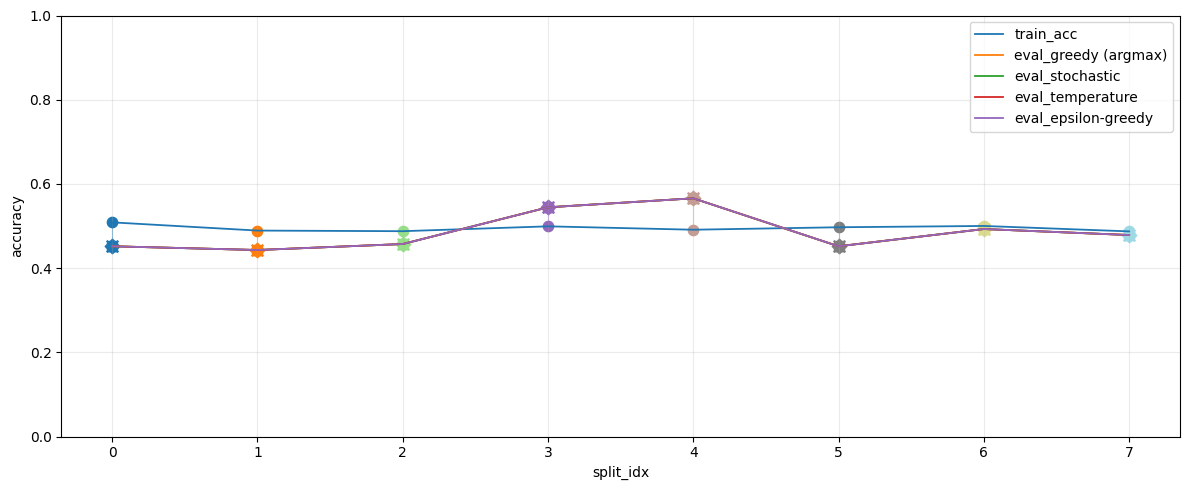

[PLOT] Saved: wf_outputs/split_accuracies.png
[OK] Split plot saved : wf_outputs/split_accuracies.png
[DONE] Outputs in: /content/wf_outputs


In [8]:
# main_train_yf.py
# ============================================================
# MAIN:
# Yahoo Finance -> (Optional) EDA -> Walk-Forward Train+Eval (PPO)
# -> Post: Model Test Layers (greedy + stochastic + temperature + epsilon-greedy)
# -> Confusion + Backtest + Final JSON Report
# -> Plot: Split accuracies
#
# - Env: CandlePredictionEnv (reward=tanh(k*signed_forward_return), single pattern_key)
# - Train: walk_forward_train_eval() (services/train_agent.py patched)
# - Memory / override / loose/strict (model-only)
#
# Outputs:
# - wf_outputs/walk_forward_summary.json
# - wf_outputs/wf_ppo_splitXXX.pt (split bazlı modeller)
# - wf_outputs/wf_ppo_split{last}.pt (final_model_path)
# - wf_outputs/final_train_report_model_only.json
# - wf_outputs/split_accuracies.png
# ============================================================

from __future__ import annotations

import json
from dataclasses import dataclass
from pathlib import Path
from typing import Any, Dict, List, Optional, Tuple

import numpy as np
import pandas as pd

try:
    import yfinance as yf
except Exception as e:
    raise RuntimeError("yfinance not installed. Run: pip install yfinance") from e

import torch
import torch.nn as nn
import torch.nn.functional as F


# ============================================================
# Small utils
# ============================================================
EPS = 1e-12


def _json_load(path: Path) -> Dict[str, Any]:
    if not path.exists():
        return {}
    try:
        return json.loads(path.read_text(encoding="utf-8"))
    except Exception:
        return {}


def _json_dump(path: Path, payload: Dict[str, Any]) -> None:
    path.parent.mkdir(parents=True, exist_ok=True)
    path.write_text(json.dumps(payload, ensure_ascii=False, indent=2), encoding="utf-8")


def _safe_mean(xs: List[float]) -> float:
    xs2: List[float] = []
    for x in xs:
        try:
            v = float(x)
            if np.isfinite(v):
                xs2.append(v)
        except Exception:
            pass
    return float(np.mean(xs2)) if xs2 else 0.0


def _weighted_accuracy(splits: List[Dict[str, Any]], acc_key: str, steps_key: str) -> float:
    num = 0.0
    den = 0.0
    for s in splits:
        acc = float(s.get(acc_key, 0.0) or 0.0)
        steps = int(s.get(steps_key, 0) or 0)
        if steps <= 0:
            continue
        num += acc * steps
        den += steps
    return float(num / den) if den > 0 else 0.0


def _as_int(x: Any, default: int = 0) -> int:
    try:
        return int(x)
    except Exception:
        return default


def _as_float(x: Any, default: float = 0.0) -> float:
    try:
        return float(x)
    except Exception:
        return default


# ============================================================
# Yahoo Finance flatten + robust time
# ============================================================
def _flatten_yf_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Robust flatten + normalize to:
      time, open, high, low, close, volume
    """
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = [str(c[0]) for c in df.columns]

    df = df.copy()

    if not isinstance(df.index, pd.RangeIndex):
        idx_name = df.index.name or "time"
        df.index.name = idx_name
        df = df.reset_index()

    df.columns = [str(c).strip().lower().replace(" ", "_") for c in df.columns]

    if "time" not in df.columns:
        if "datetime" in df.columns:
            df = df.rename(columns={"datetime": "time"})
        elif "date" in df.columns:
            df = df.rename(columns={"date": "time"})

    df = df.drop(columns=[c for c in ("adj_close", "adjclose") if c in df.columns], errors="ignore")
    return df


def yf_download_to_csv(
    ticker: str,
    start_year: int,
    end_year_exclusive: int,
    interval: str,
    out_dir: Path,
) -> Path:
    if end_year_exclusive <= start_year:
        raise ValueError("end_year must be bigger than start_year")

    start = f"{start_year:04d}-01-01"
    end = f"{end_year_exclusive:04d}-01-01"

    print(f"[YF] Downloading {ticker} | {start} -> {end} | interval={interval}")

    df = yf.download(
        tickers=ticker,
        start=start,
        end=end,
        interval=interval,
        auto_adjust=False,
        group_by="column",
        progress=False,
        threads=True,
    )
    if df is None or len(df) == 0:
        raise ValueError("Yahoo Finance is empty.")

    df = _flatten_yf_columns(df)

    required = {"time", "open", "high", "low", "close", "volume"}
    missing = required - set(df.columns)
    if missing:
        raise ValueError(f"[YF] Missing required columns: {missing}. cols={list(df.columns)[:30]}")

    df["time"] = pd.to_datetime(df["time"], utc=True, errors="coerce")
    for c in ["open", "high", "low", "close", "volume"]:
        df[c] = pd.to_numeric(df[c], errors="coerce")

    df = df.dropna(subset=["time", "open", "high", "low", "close"]).copy()
    df = df.sort_values("time").reset_index(drop=True)

    out_dir.mkdir(parents=True, exist_ok=True)
    safe_ticker = ticker.replace("/", "_").replace("=", "_")
    out_path = out_dir / f"{safe_ticker}_{start_year}_{end_year_exclusive}_{interval}.csv"
    df[["time", "open", "high", "low", "close", "volume"]].to_csv(out_path, index=False)

    print(f"[YF] Saved CSV: {out_path} | rows={len(df)}")
    return out_path


# ============================================================
# Optional EDA prints (indicator-free)
# ============================================================
def _eda_prints(df: pd.DataFrame, interval: str, wf_cfg: Dict[str, int]) -> None:
    print("\n==============================")
    print("0) EDA (PRE-TRAIN) PRINTS")
    print("==============================")

    print(f"[EDA] rows={len(df)} cols={list(df.columns)}")
    if len(df) == 0:
        print("[EDA] Empty dataframe. Stop.")
        return

    t0 = df["time"].iloc[0]
    t1 = df["time"].iloc[-1]
    print(f"[EDA] time_range: {t0}  ->  {t1}")
    print(f"[EDA] time_tz: {getattr(t0, 'tzinfo', None)} | interval_label={interval}")

    nan_counts = df.isna().sum().to_dict()
    top_nan = {k: int(v) for k, v in nan_counts.items() if int(v) > 0}
    print(f"[EDA] NaN counts (non-zero): {top_nan if top_nan else 'none'}")

    dup_time = int(df["time"].duplicated().sum())
    dup_rows = int(df.duplicated().sum())
    print(f"[EDA] duplicated time rows: {dup_time} | duplicated full rows: {dup_rows}")

    dt = df["time"].diff().dropna()
    if len(dt) > 0:
        dt_s = dt.dt.total_seconds()
        med = float(dt_s.median())
        mn = float(dt_s.min())
        mx = float(dt_s.max())
        print(f"[EDA] bar_delta_seconds: median={med:.0f} min={mn:.0f} max={mx:.0f}")
        vc = dt_s.value_counts().head(5)
        vc_str = ", ".join([f"{int(k)}s:{int(v)}" for k, v in vc.items()])
        print(f"[EDA] top_deltas: {vc_str}")
    else:
        print("[EDA] bar_delta_seconds: n/a (single row)")

    bad_high_low = int((df["high"] < df["low"]).sum())
    bad_high_openclose = int((df["high"] < df[["open", "close"]].max(axis=1)).sum())
    bad_low_openclose = int((df["low"] > df[["open", "close"]].min(axis=1)).sum())
    print(f"[EDA] OHLC violations: bad_hl={bad_high_low} bad_high={bad_high_openclose} bad_low={bad_low_openclose}")

    close = df["close"].astype(float)
    ret = close.pct_change().replace([np.inf, -np.inf], np.nan).dropna()
    if len(ret) > 0:
        ret_mean = float(ret.mean())
        ret_std = float(ret.std(ddof=0))
        pos_rate = float((ret > 0).mean())
        abs_p99 = float(ret.abs().quantile(0.99))
        print(
            f"[EDA] returns: n={len(ret)} mean={ret_mean:.6g} std={ret_std:.6g} "
            f"pos_rate={pos_rate:.3f} abs_p99={abs_p99:.6g}"
        )
    else:
        print("[EDA] returns: n/a (too short)")

    n = len(df)
    min_train = int(wf_cfg["min_train_size"])
    test_size = int(wf_cfg["test_size"])
    step_size = int(wf_cfg["step_size"])

    if n < (min_train + test_size):
        print(f"[EDA] WF feasibility: NOT ENOUGH DATA (need >= {min_train + test_size}, have {n})")
    else:
        train_end = min_train
        splits = 0
        while train_end + test_size <= n:
            splits += 1
            train_end += step_size
        print(
            f"[EDA] WF feasibility: OK | estimated_splits={splits} | "
            f"n={n} min_train={min_train} test={test_size} step={step_size}"
        )


# ============================================================
# Minimal model loader (same as train_agent MLPActorCritic)
# ============================================================
class MLPActorCritic(nn.Module):
    def __init__(self, obs_dim: int, act_dim: int, hidden_sizes: Tuple[int, int] = (128, 128)):
        super().__init__()
        h1, h2 = hidden_sizes
        self.fc1 = nn.Linear(obs_dim, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.pi = nn.Linear(h2, act_dim)
        self.v = nn.Linear(h2, 1)

    def forward(self, obs: torch.Tensor):
        x = F.relu(self.fc1(obs))
        x = F.relu(self.fc2(x))
        logits = self.pi(x)
        value = self.v(x).squeeze(-1)
        return logits, value


def _load_model(model_path: Path, device: str = "cpu") -> Tuple[MLPActorCritic, torch.device]:
    dev = torch.device(device)
    try:
        payload = torch.load(str(model_path), map_location=dev)
    except Exception:
        payload = torch.load(str(model_path), map_location=dev, weights_only=False)

    obs_dim = int(payload["obs_dim"])
    act_dim = int(payload.get("act_dim", 2))
    hidden_sizes = tuple(payload.get("hidden_sizes", (128, 128)))

    model = MLPActorCritic(obs_dim=obs_dim, act_dim=act_dim, hidden_sizes=hidden_sizes).to(dev)
    model.load_state_dict(payload["state_dict"])
    model.eval()
    return model, dev


# ============================================================
# Confusion matrix (binary)
# ============================================================
@dataclass
class ConfMat:
    tp: int = 0
    tn: int = 0
    fp: int = 0
    fn: int = 0

    def update(self, y_true: int, y_pred: int) -> None:
        yt = int(y_true)
        yp = int(y_pred)
        if yt == 1 and yp == 1:
            self.tp += 1
        elif yt == 0 and yp == 0:
            self.tn += 1
        elif yt == 0 and yp == 1:
            self.fp += 1
        elif yt == 1 and yp == 0:
            self.fn += 1

    @property
    def accuracy(self) -> float:
        den = self.tp + self.tn + self.fp + self.fn
        return float((self.tp + self.tn) / den) if den > 0 else 0.0

    @property
    def precision(self) -> float:
        den = self.tp + self.fp
        return float(self.tp / den) if den > 0 else 0.0

    @property
    def recall(self) -> float:
        den = self.tp + self.fn
        return float(self.tp / den) if den > 0 else 0.0

    @property
    def f1(self) -> float:
        p = self.precision
        r = self.recall
        den = p + r
        return float(2 * p * r / den) if den > 0 else 0.0

    def as_dict(self) -> Dict[str, Any]:
        return {
            "tp": self.tp,
            "tn": self.tn,
            "fp": self.fp,
            "fn": self.fn,
            "accuracy": self.accuracy,
            "precision": self.precision,
            "recall": self.recall,
            "f1": self.f1,
        }


# ============================================================
# Backtest (simple)
# ============================================================
@dataclass
class BacktestResult:
    n_steps: int
    total_return: float
    avg_step_return: float
    sharpe_like: float
    win_rate: float
    n_trades: int

    def as_dict(self) -> Dict[str, Any]:
        return {
            "n_steps": self.n_steps,
            "total_return": self.total_return,
            "avg_step_return": self.avg_step_return,
            "sharpe_like": self.sharpe_like,
            "win_rate": self.win_rate,
            "n_trades": self.n_trades,
        }


def _backtest_from_records(
    df: pd.DataFrame,
    t_indices: List[int],
    actions: List[int],
    prediction_horizon: int,
    fee_bps: float = 0.0,
) -> BacktestResult:
    if len(t_indices) != len(actions) or len(actions) == 0:
        return BacktestResult(0, 0.0, 0.0, 0.0, 0.0, 0)

    closes = df["close"].astype(float).to_numpy()
    n = len(closes)

    fee = float(fee_bps) / 10000.0
    eq = 1.0

    rets: List[float] = []
    n_trades = 0
    prev_pos: Optional[int] = None

    for t, a in zip(t_indices, actions):
        t = int(t)
        h = int(prediction_horizon)
        if t < 0 or (t + h) >= n:
            continue

        pos = 1 if int(a) == 1 else -1
        raw = (closes[t + h] / max(closes[t], EPS)) - 1.0
        step_ret = pos * raw

        if prev_pos is None:
            n_trades += 1
            step_ret -= fee
        else:
            if pos != prev_pos:
                n_trades += 1
                step_ret -= fee

        prev_pos = pos
        rets.append(step_ret)
        eq *= (1.0 + step_ret)

    if not rets:
        return BacktestResult(0, 0.0, 0.0, 0.0, 0.0, 0)

    arr = np.array(rets, dtype=np.float64)
    total_return = float(eq - 1.0)
    avg_step = float(arr.mean())
    sd = float(arr.std(ddof=0))
    sharpe_like = float(avg_step / (sd + 1e-12)) * np.sqrt(252.0)
    win_rate = float((arr > 0).mean())

    return BacktestResult(
        n_steps=int(len(arr)),
        total_return=total_return,
        avg_step_return=avg_step,
        sharpe_like=sharpe_like,
        win_rate=win_rate,
        n_trades=int(n_trades),
    )


# ============================================================
# Policy helpers (greedy / stochastic / temperature / eps-greedy)
# ============================================================
@torch.no_grad()
def _policy_greedy(logits: torch.Tensor) -> int:
    return int(torch.argmax(logits, dim=-1).item())


@torch.no_grad()
def _policy_stochastic(logits: torch.Tensor) -> int:
    probs = torch.softmax(logits, dim=-1)
    a = torch.multinomial(probs, num_samples=1)
    return int(a.item())


@torch.no_grad()
def _policy_temperature(logits: torch.Tensor, temp: float = 1.3) -> int:
    t = float(max(temp, 1e-6))
    probs = torch.softmax(logits / t, dim=-1)
    a = torch.multinomial(probs, num_samples=1)
    return int(a.item())


@torch.no_grad()
def _policy_epsilon_greedy(logits: torch.Tensor, eps: float = 0.1) -> int:
    e = float(np.clip(eps, 0.0, 1.0))
    if np.random.rand() < e:
        return int(np.random.randint(0, logits.shape[-1]))
    return int(torch.argmax(logits, dim=-1).item())


# ============================================================
# Post-run evaluation per split: model-only tests
# ============================================================
@torch.no_grad()
def _eval_split_model_tests(
    test_df: pd.DataFrame,
    model_path: Path,
    window_size: int,
    prediction_horizon: int,
    device: str,
    fee_bps: float,
    temperature: float = 1.3,
    eps_greedy: float = 0.1,
) -> Dict[str, Any]:
    model, dev = _load_model(model_path, device=device)

    def run_env(mode: str) -> Tuple[ConfMat, BacktestResult, float, float]:
        env = CandlePredictionEnv(
            df=test_df.reset_index(drop=True),
            window_size=window_size,
            prediction_horizon=prediction_horizon,
        )
        obs, info = env.reset()
        cm = ConfMat()

        t_indices: List[int] = []
        actions: List[int] = []
        rewards: List[float] = []
        frs: List[float] = []

        while True:
            x = torch.tensor(obs, dtype=torch.float32, device=dev).unsqueeze(0)
            x = torch.nan_to_num(x, nan=0.0, posinf=0.0, neginf=0.0)
            logits, _ = model(x)
            logits = torch.nan_to_num(logits, nan=0.0, posinf=0.0, neginf=0.0)

            if mode == "greedy":
                a = _policy_greedy(logits)
            elif mode == "stochastic":
                a = _policy_stochastic(logits)
            elif mode == "temperature":
                a = _policy_temperature(logits, temp=temperature)
            elif mode == "epsilon":
                a = _policy_epsilon_greedy(logits, eps=eps_greedy)
            else:
                a = _policy_greedy(logits)

            next_obs, reward, terminated, truncated, info2 = env.step(int(a))

            y_true = int(info2.get("true_direction", 0) or 0)
            cm.update(y_true=y_true, y_pred=int(a))

            t_val = info2.get("t", None)
            if t_val is not None:
                t_indices.append(int(t_val))
                actions.append(int(a))

            rewards.append(float(reward))
            frs.append(float(info2.get("forward_return", 0.0) or 0.0))

            obs, info = next_obs, info2
            if bool(terminated or truncated):
                break

        bt = _backtest_from_records(
            test_df.reset_index(drop=True),
            t_indices=t_indices,
            actions=actions,
            prediction_horizon=prediction_horizon,
            fee_bps=fee_bps,
        )
        reward_mean = float(np.mean(rewards)) if rewards else 0.0
        fr_mean = float(np.mean(frs)) if frs else 0.0
        return cm, bt, reward_mean, fr_mean

    out: Dict[str, Any] = {"model_path": str(model_path), "modes": {}}
    for mode in ("greedy", "stochastic", "temperature", "epsilon"):
        cm, bt, rmean, frmean = run_env(mode)
        out["modes"][mode] = {
            "confusion": cm.as_dict(),
            "backtest": bt.as_dict(),
            "reward_mean": rmean,
            "forward_return_mean": frmean,
        }
    out["params"] = {"temperature": float(temperature), "eps_greedy": float(eps_greedy), "fee_bps": float(fee_bps)}
    return out


def _print_model_tests_summary(split_idx: int, tests: Dict[str, Any]) -> None:
    modes = tests.get("modes", {})
    print(f"\n[POST] split#{split_idx:03d} | model={Path(tests.get('model_path','')).name}")
    for mode, d in modes.items():
        cm = d.get("confusion", {})
        bt = d.get("backtest", {})
        print(
            f"  - {mode:11s} | acc={cm.get('accuracy',0.0):.4f} "
            f"p={cm.get('precision',0.0):.4f} r={cm.get('recall',0.0):.4f} f1={cm.get('f1',0.0):.4f} "
            f"(tp={cm.get('tp',0)} tn={cm.get('tn',0)} fp={cm.get('fp',0)} fn={cm.get('fn',0)})"
        )
        print(
            f"               | reward_mean={d.get('reward_mean',0.0):.6f} "
            f"fr_mean={d.get('forward_return_mean',0.0):.9f} "
            f"bt_total={bt.get('total_return',0.0):.4f} win={bt.get('win_rate',0.0):.3f} "
            f"trades={bt.get('n_trades',0)} sharpe_like={bt.get('sharpe_like',0.0):.3f}"
        )


# ============================================================
# Plot: split accuracies in one chart, splits color-coded
# ============================================================
def plot_split_accuracies(summary_path: Path, out_png: Path, show: bool = True) -> None:
    """
    walk_forward_summary.json içinden:
      train_acc
      eval_greedy.accuracy
      eval_stochastic.accuracy
      eval_temperature.accuracy
      eval_epsilon.accuracy
    tek grafikte gösterir.
    Her split kendi rengiyle işaretlenir.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    summary = _json_load(summary_path)
    splits = summary.get("splits", [])
    if not splits:
        print("[PLOT] No splits in summary.")
        return

    splits = sorted(splits, key=lambda s: int(s.get("split_idx", 0)))
    x = np.array([int(s.get("split_idx", 0)) for s in splits], dtype=int)

    train = np.array([float(s.get("train_acc", 0.0) or 0.0) for s in splits], dtype=float)

    def _nested_acc(s: Dict[str, Any], key: str, fallback: float) -> float:
        d = s.get(key, {})
        if isinstance(d, dict) and "accuracy" in d:
            return float(d.get("accuracy", fallback) or fallback)
        return float(fallback)

    # backward compatible fallback: eval_acc
    greedy = np.array([_nested_acc(s, "eval_greedy", float(s.get("eval_acc", 0.0) or 0.0)) for s in splits], dtype=float)
    stoch  = np.array([_nested_acc(s, "eval_stochastic", float(s.get("eval_acc", 0.0) or 0.0)) for s in splits], dtype=float)
    temp   = np.array([_nested_acc(s, "eval_temperature", float(s.get("eval_acc", 0.0) or 0.0)) for s in splits], dtype=float)
    eps    = np.array([_nested_acc(s, "eval_epsilon", float(s.get("eval_acc", 0.0) or 0.0)) for s in splits], dtype=float)

    plt.figure(figsize=(12, 5))
    cmap = plt.cm.get_cmap("tab20", len(x))

    # split-color vertical "stack"
    for i, xi in enumerate(x):
        col = cmap(i)
        ys = [train[i], greedy[i], stoch[i], temp[i], eps[i]]
        plt.plot([xi] * len(ys), ys, linewidth=0.8, alpha=0.45, color=col)
        plt.scatter([xi], [train[i]], marker="o", s=55, color=col)
        plt.scatter([xi], [greedy[i]], marker="s", s=55, color=col)
        plt.scatter([xi], [stoch[i]], marker="^", s=55, color=col)
        plt.scatter([xi], [temp[i]], marker="D", s=55, color=col)
        plt.scatter([xi], [eps[i]], marker="x", s=70, color=col)

    # trend lines
    plt.plot(x, train, linewidth=1.3, label="train_acc")
    plt.plot(x, greedy, linewidth=1.3, label="eval_greedy (argmax)")
    plt.plot(x, stoch, linewidth=1.3, label="eval_stochastic")
    plt.plot(x, temp, linewidth=1.3, label="eval_temperature")
    plt.plot(x, eps, linewidth=1.3, label="eval_epsilon-greedy")

    plt.xlabel("split_idx")
    plt.ylabel("accuracy")
    plt.ylim(0.0, 1.0)
    plt.grid(True, alpha=0.25)
    plt.legend()
    plt.tight_layout()

    out_png.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(out_png, dpi=170)
    if show:
        plt.show()
    plt.close()
    print(f"[PLOT] Saved: {out_png}")


# ============================================================
# MAIN
# ============================================================
def main():
    print("=== MAIN: Yahoo Finance -> EDA -> Walk-Forward Train+Eval -> Post Tests -> Report + Plot ===")

    ticker = input("Yahoo Finance Ticker (Example: GC=F, BTC-USD, AAPL, EURUSD=X): ").strip()
    if not ticker:
        raise ValueError("Ticker can not be unselected.")

    start_year = int(input("Entry year (example: 2025): ").strip())
    end_year = int(input("End year (exclusive) (example: 2026): ").strip())

    interval = input("Interval (default=1h, alternatif=1d): ").strip() or "1h"
    out_dir = Path(input("Output dir (default=wf_outputs): ").strip() or "wf_outputs")

    # WF config
    window_size = _as_int(input("window_size (default=10): ").strip() or "10", 10)
    prediction_horizon = _as_int(input("prediction_horizon (default=1): ").strip() or "1", 1)
    test_size = _as_int(input("test_size (default=573): ").strip() or "573", 573)
    step_size = _as_int(input("step_size (default=286): ").strip() or "286", 286)
    min_train_size = _as_int(input("min_train_size (default=3443): ").strip() or "3443", 3443)

    device = (input("device (cpu/cuda) default=cpu: ").strip() or "cpu").lower()
    print_each_step_in = (input("print_each_step? (y/n) default=n: ").strip() or "n").lower()
    print_each_step = True if print_each_step_in in ("y", "yes", "1", "true") else False

    eda_in = (input("EDA runs? (y/n) default=y: ").strip() or "y").lower()
    run_eda = True if eda_in in ("y", "yes", "1", "true") else False

    fee_bps = _as_float(input("Backtest fee_bps (default=0.0): ").strip() or "0.0", 0.0)

    # Post test layer params
    temperature = _as_float(input("POST temperature sampling (default=1.3): ").strip() or "1.3", 1.3)
    eps_greedy = _as_float(input("POST epsilon-greedy eps (default=0.1): ").strip() or "0.1", 0.1)

    cfg = {
        "window_size": int(window_size),
        "prediction_horizon": int(prediction_horizon),
        "test_size": int(test_size),
        "step_size": int(step_size),
        "min_train_size": int(min_train_size),
    }

    # 1) Download
    csv_path = yf_download_to_csv(
        ticker=ticker,
        start_year=start_year,
        end_year_exclusive=end_year,
        interval=interval,
        out_dir=out_dir,
    )

    # 2) Load CSV
    df = pd.read_csv(csv_path)
    df.columns = [str(c).strip().lower().replace(" ", "_") for c in df.columns]
    df["time"] = pd.to_datetime(df["time"], utc=True, errors="coerce")
    df = df.dropna(subset=["time", "open", "high", "low", "close"]).sort_values("time").reset_index(drop=True)

    # 3) Optional EDA
    if run_eda:
        _eda_prints(df=df, interval=interval, wf_cfg=cfg)

    # 4) Train + Eval (walk-forward)
    print("\n==============================")
    print("1) WALK-FORWARD TRAIN+EVAL RUN")
    print("==============================")

    res = walk_forward_train_eval(
        csv_path=str(csv_path),
        instrument=ticker,
        timeframe=interval,
        out_dir=str(out_dir),
        window_size=int(window_size),
        prediction_horizon=int(prediction_horizon),
        test_size=int(test_size),
        step_size=int(step_size),
        min_train_size=int(min_train_size),
        device=device,
        print_each_step=print_each_step,
    )

    summary_path = Path(res.get("summary_path", out_dir / "walk_forward_summary.json"))
    final_model_path = res.get("final_model_path", "")
    n_splits = int(res.get("n_splits", 0) or 0)

    # 5) Accuracy summary
    print("\n==============================")
    print("2) FINAL WF SUMMARY")
    print("==============================")
    print(f"[OUT] summary_path: {summary_path}")
    print(f"[OUT] final_model_path: {final_model_path}")
    print(f"[OUT] n_splits: {n_splits}")

    summary = _json_load(summary_path)
    splits = summary.get("splits", []) if isinstance(summary.get("splits", []), list) else []
    if not splits:
        print("[WARN] There is no Split. Dataset could be short or min_train_size/test_size could be bigger.")
        return

    train_acc_weighted = _weighted_accuracy(splits, "train_acc", "train_steps")
    eval_acc_weighted = _weighted_accuracy(splits, "eval_acc", "eval_steps")
    train_acc_mean = _safe_mean([float(s.get("train_acc", 0.0) or 0.0) for s in splits])
    eval_acc_mean = _safe_mean([float(s.get("eval_acc", 0.0) or 0.0) for s in splits])

    total_train_steps = int(sum(int(s.get("train_steps", 0) or 0) for s in splits))
    total_eval_steps = int(sum(int(s.get("eval_steps", 0) or 0) for s in splits))
    best_eval = max((float(s.get("eval_acc", 0.0) or 0.0) for s in splits), default=0.0)
    best_train = max((float(s.get("train_acc", 0.0) or 0.0) for s in splits), default=0.0)

    print("\n--- Split Recap ---")
    for s in sorted(splits, key=lambda z: int(z.get("split_idx", 0))):
        i = int(s.get("split_idx", -1))
        tr = int(s.get("train_rows", 0) or 0)
        te = int(s.get("test_rows", 0) or 0)
        tsa = int(s.get("train_steps", 0) or 0)
        esa = int(s.get("eval_steps", 0) or 0)
        ta = float(s.get("train_acc", 0.0) or 0.0)
        ea = float(s.get("eval_acc", 0.0) or 0.0)
        print(
            f"split#{i:03d} | train_rows={tr} test_rows={te} | "
            f"train_steps={tsa} train_acc={ta:.4f} | "
            f"eval_steps={esa} eval_acc={ea:.4f}"
        )

    print("\n--- Aggregate Accuracy ---")
    print(f"[ACC] train_weighted={train_acc_weighted:.4f} over_steps={total_train_steps}")
    print(f"[ACC] eval_weighted ={eval_acc_weighted:.4f} over_steps={total_eval_steps}")
    print(f"[ACC] train_mean    ={train_acc_mean:.4f}")
    print(f"[ACC] eval_mean     ={eval_acc_mean:.4f}")
    print(f"[ACC] best_train    ={best_train:.4f}")
    print(f"[ACC] best_eval     ={best_eval:.4f}")

    # 6) Post: model-only tests per split
    print("\n==============================")
    print("3) MODEL TEST LAYERS (POST-TRAIN)")
    print("==============================")

    n = len(df)
    split_idx = 0
    train_end = int(min_train_size)

    post_per_split: List[Dict[str, Any]] = []

    overall_cm: Dict[str, ConfMat] = {m: ConfMat() for m in ("greedy", "stochastic", "temperature", "epsilon")}
    overall_bt: Dict[str, List[BacktestResult]] = {m: [] for m in ("greedy", "stochastic", "temperature", "epsilon")}
    overall_reward_means: Dict[str, List[float]] = {m: [] for m in ("greedy", "stochastic", "temperature", "epsilon")}
    overall_fr_means: Dict[str, List[float]] = {m: [] for m in ("greedy", "stochastic", "temperature", "epsilon")}

    while train_end + int(test_size) <= n:
        test_df = df.iloc[train_end : train_end + int(test_size)].reset_index(drop=True)

        model_path = out_dir / f"wf_ppo_split{split_idx:03d}.pt"
        if not model_path.exists():
            print(f"[POST][WARN] model not found for split#{split_idx:03d}: {model_path} (skip)")
            split_idx += 1
            train_end += int(step_size)
            continue

        tests = _eval_split_model_tests(
            test_df=test_df,
            model_path=model_path,
            window_size=int(window_size),
            prediction_horizon=int(prediction_horizon),
            device=device,
            fee_bps=float(fee_bps),
            temperature=float(temperature),
            eps_greedy=float(eps_greedy),
        )
        post_per_split.append(
            {
                "split_idx": split_idx,
                "test_rows": int(len(test_df)),
                **tests,
            }
        )
        _print_model_tests_summary(split_idx, tests)

        for mode, d in tests.get("modes", {}).items():
            cm_d = d.get("confusion", {})
            bt_d = d.get("backtest", {})
            overall_cm[mode].tp += int(cm_d.get("tp", 0))
            overall_cm[mode].tn += int(cm_d.get("tn", 0))
            overall_cm[mode].fp += int(cm_d.get("fp", 0))
            overall_cm[mode].fn += int(cm_d.get("fn", 0))

            overall_bt[mode].append(BacktestResult(**bt_d))
            overall_reward_means[mode].append(float(d.get("reward_mean", 0.0) or 0.0))
            overall_fr_means[mode].append(float(d.get("forward_return_mean", 0.0) or 0.0))

        split_idx += 1
        train_end += int(step_size)

    def bt_weighted_total(bt_list: List[BacktestResult]) -> Dict[str, float]:
        num = 0.0
        den = 0.0
        wins = 0.0
        trades = 0.0
        sharpe_num = 0.0
        sharpe_den = 0.0
        for b in bt_list:
            if b.n_steps <= 0:
                continue
            num += float(b.avg_step_return) * b.n_steps
            den += b.n_steps
            wins += float(b.win_rate) * b.n_steps
            trades += float(b.n_trades)
            sharpe_num += float(b.sharpe_like) * b.n_steps
            sharpe_den += b.n_steps
        avg_step = (num / den) if den > 0 else 0.0
        win_rate = (wins / den) if den > 0 else 0.0
        sharpe_like = (sharpe_num / sharpe_den) if sharpe_den > 0 else 0.0
        return {
            "weighted_avg_step_return": float(avg_step),
            "weighted_win_rate": float(win_rate),
            "weighted_sharpe_like": float(sharpe_like),
            "sum_trades": float(trades),
            "sum_steps": float(den),
        }

    print("\n==============================")
    print("4) OVERALL POST SUMMARY (MODEL TEST LAYERS)")
    print("==============================")
    overall_summary: Dict[str, Any] = {"modes": {}}
    for mode in ("greedy", "stochastic", "temperature", "epsilon"):
        cm = overall_cm[mode].as_dict()
        bt = bt_weighted_total(overall_bt[mode])
        r_mean = float(np.mean(overall_reward_means[mode])) if overall_reward_means[mode] else 0.0
        fr_mean = float(np.mean(overall_fr_means[mode])) if overall_fr_means[mode] else 0.0

        overall_summary["modes"][mode] = {
            "confusion": cm,
            "backtest_weighted_like": bt,
            "reward_mean_avg_over_splits": r_mean,
            "forward_return_mean_avg_over_splits": fr_mean,
        }

        print(f"[{mode}] confusion: {cm}")
        print(f"[{mode}] reward_mean(avg over splits): {r_mean:.6f} | fr_mean(avg over splits): {fr_mean:.9f}")
        print(f"[{mode}] bt_overall_like: {bt}")

    # 7) Final report JSON
    report = {
        "inputs": {
            "ticker": ticker,
            "start_year": start_year,
            "end_year_exclusive": end_year,
            "interval": interval,
            "window_size": int(window_size),
            "prediction_horizon": int(prediction_horizon),
            "test_size": int(test_size),
            "step_size": int(step_size),
            "min_train_size": int(min_train_size),
            "device": device,
            "print_each_step": bool(print_each_step),
            "run_eda": bool(run_eda),
            "fee_bps": float(fee_bps),
            "post_temperature": float(temperature),
            "post_eps_greedy": float(eps_greedy),
        },
        "paths": {
            "csv_path": str(csv_path),
            "summary_path": str(summary_path),
            "final_model_path": str(final_model_path),
            "out_dir": str(out_dir),
        },
        "wf_accuracy": {
            "n_splits": len(splits),
            "total_train_steps": total_train_steps,
            "total_eval_steps": total_eval_steps,
            "train_weighted": train_acc_weighted,
            "eval_weighted": eval_acc_weighted,
            "train_mean": train_acc_mean,
            "eval_mean": eval_acc_mean,
            "best_train": best_train,
            "best_eval": best_eval,
        },
        "post_model_tests": {
            "overall": overall_summary,
            "per_split": post_per_split,
        },
        "wf_summary_raw": summary,
    }

    report_path = out_dir / "final_train_report_model_only.json"
    _json_dump(report_path, report)

    print("\n==============================")
    print("5) FINAL REPORT + PLOT")
    print("==============================")
    print(f"[OK] Final report saved: {report_path}")

    # 8) Plot split accuracies
    plot_path = out_dir / "split_accuracies.png"
    plot_split_accuracies(summary_path=summary_path, out_png=plot_path, show=True)
    print(f"[OK] Split plot saved : {plot_path}")
    print(f"[DONE] Outputs in: {out_dir.resolve()}")


if __name__ == "__main__":
    main()
